# ASEAN Fintech Market Entry Readiness Scorecard
### Executive Summary
This project builds a Fintech Market Readiness Scorecard for ASEAN countries using real-world data from the World Bank Findex and GSMA Mobile Connectivity Index. It evaluates financial inclusion, digital literacy, and infrastructure readiness to help identify optimal market entry points.




## Objective  
To help fintech startups assess and prioritize ASEAN countries based on digital inclusion, mobile connectivity, and financial infrastructure — enabling data-backed expansion strategies.


## Outcome
Countries are ranked into strategic tiers (Tier 1–3) with actionable recommendations to guide market entry and expansion.

##  Data Sources & Preprocessing  

###  Data Sources:
1. **World Bank Global Findex 2021**  
   - Indicators: Bank account ownership, mobile money usage, digital payments

2. **GSMA Mobile Connectivity Index 2025**  
   - Indicators: Mobile penetration, affordability, network performance

###  Preprocessing:
- Filtered for ASEAN countries only
- Cleaned null values, standardized column names
- Normalized all numerical features using MinMaxScaler
- Merged datasets on country name


##  🔹Data Cleaning & Feature Engineering

### Financial Inclusion Features (Findex Data)
The following indicators were extracted for ASEAN countries:

- Account (% age 15+)
- Financial Institution Accounts
- Mobile Money Usage
- Gender Gap (Male – Female account ownership)



In [ ]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import io


In [ ]:
from google.colab import files

print("👉 Upload DatabankWide.xlsx")
findex_upload = files.upload()

print("👉 Upload MCI_data_2025.xlsx")
mci_upload = files.upload()


👉 Upload DatabankWide.xlsx


Saving MCI_data_2025.xlsx to MCI_data_2025.xlsx
Saving DatabankWide.xlsx to DatabankWide.xlsx
👉 Upload MCI_data_2025.xlsx


Saving MCI_data_2025.xlsx to MCI_data_2025 (1).xlsx


In [ ]:
# Load Excel files
findex = pd.read_excel('DatabankWide.xlsx')
mci = pd.read_excel('MCI_data_2025.xlsx')

In [ ]:
findex.columns

Index(['Country name', 'Country code', 'Year', 'Adult populaiton', 'Region',
       'Income group', 'Account (% age 15+)',
       'Financial institution account (% age 15+)',
       'First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)',
       'First financial institution account ever was opened to receive a wage payment (% age 15+)',
       ...
       'Used a mobile phone or the internet to access an account, young (% ages 15-24)',
       'Used a mobile phone or the internet to access an account, older (% age 25+)',
       'Used a mobile phone or the internet to access an account, primary education or less (% ages 15+)',
       'Used a mobile phone or the internet to access an account, secondary education or more (% ages 15+)',
       'Used a mobile phone or the internet to access an account, income, poorest 40% (% ages 15+)',
       'Used a mobile phone or the internet to access an account, income, richest 60% (% ages

In [ ]:
# Clean column names
findex = findex.rename(columns=lambda x: x.strip())

In [ ]:
[col for col in findex.columns if "digital" in col.lower()]


['Made or received a digital payment (% age 15+)',
 'Made a digital payment (% age 15+)',
 'Received digital payments (% age 15+)',
 'Made a digital in-store merchant payment (age 15+)',
 'Made a digital in-store merchant payment for the first time after COVID-19 started (% age 15+)',
 'Made a digital in-store merchant payment for the first time after COVID-19 started (% who made a digital in-store payment, age 15+)',
 'Made a digital in-store merchant payment: using a mobile phone (% age 15+)',
 'Made a digital online merchant payment for an online purchase (% age 15+)',
 'Made a digital online payment for an online purchase (% of internet purchasers, age 15+)',
 'Made a digital online payment for an online purchase for the first time after COVID-19 started (% age 15+)',
 'Made a digital online payment for an online purchase for the first time after COVID-19 started (% of internet purchasers, age 15+)',
 'Made a digital merchant payment (% age 15+)',
 'Made a digital merchant payment 

In [ ]:
asean_countries = [
    'Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand',
    'Vietnam', 'Brunei Darussalam', 'Cambodia', 'Lao PDR', 'Myanmar'
]
findex_cleaned = findex[findex['Country name'].isin(asean_countries)][[
    'Country name',
    'Account (% age 15+)',
    'Made or received a digital payment (% age 15+)',  # <- updated
    'Mobile money account (% age 15+)',
    'Account, female (% age 15+)',
    'Account, male (% age 15+)',
]]

# Rename for clarity
findex_cleaned = findex_cleaned.rename(columns={
    'Country name': 'Country',
    'Account (% age 15+)': 'Account_Penetration',
    'Made or received a digital payment (% age 15+)': 'Digital_Payment_Usage',
    'Mobile money account (% age 15+)': 'Mobile_Money_Usage',
    'Account, female (% age 15+)': 'Female_Account',
    'Account, male (% age 15+)': 'Male_Account'
})

# Compute gender gap
findex_cleaned['Gender_Gap'] = (
    findex_cleaned['Male_Account'] - findex_cleaned['Female_Account']
)


In [ ]:
mci.columns


Index(['Unnamed: 0', 'Unnamed: 1'], dtype='object')

In [ ]:
findex = pd.read_excel(io.BytesIO(list(findex_upload.values())[0]))
mci = pd.read_excel(io.BytesIO(list(mci_upload.values())[0]))


In [ ]:
# Define ASEAN countries of interest
asean_countries = ['Singapore', 'Malaysia', 'Thailand', 'Indonesia', 'Philippines', 'Vietnam']


In [ ]:
print(findex_cleaned)

         Country  Account_Penetration  Digital_Payment_Usage  \
80      Cambodia             0.036597                    NaN   
81      Cambodia             0.221653               0.176460   
82      Cambodia             0.216718               0.155684   
83      Cambodia             0.333950               0.260773   
228    Indonesia             0.195820                    NaN   
229    Indonesia             0.360590               0.233148   
230    Indonesia             0.488575               0.346083   
231    Indonesia             0.517553               0.371859   
286      Lao PDR             0.267735                    NaN   
287      Lao PDR             0.290564               0.133475   
288      Lao PDR             0.373200               0.212487   
319     Malaysia             0.661738                    NaN   
320     Malaysia             0.806746               0.625984   
321     Malaysia             0.853437               0.704196   
322     Malaysia             0.883749   

In [ ]:
findex_cleaned.to_csv('findex_cleaned.csv', index=False)

In [ ]:
findex_cleaned = pd.read_csv('findex_cleaned.csv')

In [ ]:
from google.colab import files
files.download('findex_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🔷 MCI Dataset Cleaning & Feature Extraction Summary

In the following steps , I Processed the GSMA Mobile Connectivity Index (MCI) dataset to extract digital readiness indicators for ASEAN countries. The dataset had two key sheets:

- **Data**: Contained metadata about indicators and their weights.
  - Skipped top 12 rows to reach actual content.
  - Extracted key columns: `Dimension`, `Indicator`, `Indicator Weight`, and `Data Source`.
  - Cleaned text, forward-filled missing values, and imputed missing weights using the median.

- **Index Scores**: Contained country-wise indicator values.
  - Extracted headers from the 3rd row and removed empty columns.
  - Converted numeric fields and retained country-year-index information.
  
After cleaning, Saved both sheets (`mci_data_clean.pkl` and `mci_index_scores_clean.pkl`) for further use. This cleaned MCI data provides:
- 📡 **Network Coverage**
- 📱 **Mobile Ownership**
- 🧠 **Literacy Rate** (as a proxy for digital literacy)

These features are later merged with financial inclusion data (Findex) to compute a composite **Market Readiness Score**.



In [ ]:
print(mci.info())
print(mci.describe())
print(mci.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  19 non-null     object 
dtypes: float64(1), object(1)
memory usage: 772.0+ bytes
None
       Unnamed: 0
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Unnamed: 0    40
Unnamed: 1    21
dtype: int64


In [ ]:
mci_cleaned = mci.dropna(axis=1, how='all')  # drops columns where all values are NaN
print(mci_cleaned.head())


  Unnamed: 1
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


In [ ]:
xl = pd.ExcelFile(io.BytesIO(list(mci_upload.values())[0]))
print("Sheet names:", xl.sheet_names)


Sheet names: ['Read me', 'Data', 'Index Scores']


In [ ]:
# Load Excel file again if needed
xl = pd.ExcelFile(io.BytesIO(list(mci_upload.values())[0]))

# Preview 'Data' sheet
data_preview = xl.parse('Data', header=None)
print("Preview of 'Data' sheet:")
print(data_preview.head(20))

# Preview 'Index Scores' sheet
index_preview = xl.parse('Index Scores', header=None)
print("\nPreview of 'Index Scores' sheet:")
print(index_preview.head(20))


Preview of 'Data' sheet:
     0                                                  1  \
0  NaN                                                NaN   
1  NaN                                                NaN   
2  NaN                                                NaN   
3  NaN                                                NaN   
4  NaN                                                NaN   
5  NaN                                                NaN   
6  NaN                                                NaN   
7  NaN                    DATA, AGGREGATING AND WEIGHTING   
8  NaN                                                NaN   
9  NaN  The table below provides a list of indicators ...   
10 NaN  For further information on the data as well as...   
11 NaN                                                NaN   
12 NaN                                            ENABLER   
13 NaN                               Infrastructure (25%)   
14 NaN                                                NaN   

In [ ]:
import pandas as pd

# Use the exact file name from the upload (probably 'MCI_data_2025.xlsx' or 'MCI_data_2025 (1).xlsx')
file_name = list(mci_upload.keys())[0]

# Load both sheets without header (since you want to clean starting from row 12)
df_data = pd.read_excel(file_name, sheet_name='Data', header=None)
df_index_scores = pd.read_excel(file_name, sheet_name='Index Scores', header=None)

print("Data sheet shape:", df_data.shape)
print("Index Scores sheet shape:", df_index_scores.shape)


Data sheet shape: (54, 6)
Index Scores sheet shape: (1906, 53)


In [ ]:
#  Select data rows starting from row 12 (index 12 because 0-based)
df_data_clean = df_data.iloc[12:].copy()

#  Reset index for neatness
df_data_clean.reset_index(drop=True, inplace=True)

#  Assign column names based on what your sheet structure looks like
df_data_clean.columns = ['col0', 'Dimension', 'Dimension_Subcategory', 'Indicator', 'Indicator_Weight', 'Data_Source']

#  Fill missing 'Dimension' values by forward fill (fill down)
df_data_clean['Dimension'] = df_data_clean['Dimension'].ffill()

#  Remove rows where 'Indicator' is empty
df_data_clean = df_data_clean[~df_data_clean['Indicator'].isna()]

#  Keep only columns you need
df_data_clean = df_data_clean[['Dimension', 'Indicator', 'Indicator_Weight', 'Data_Source']]

#  Clean text columns and convert weights to numbers
df_data_clean['Dimension'] = df_data_clean['Dimension'].str.strip()
df_data_clean['Indicator'] = df_data_clean['Indicator'].str.strip()
df_data_clean['Indicator_Weight'] = pd.to_numeric(df_data_clean['Indicator_Weight'], errors='coerce')
df_data_clean['Data_Source'] = df_data_clean['Data_Source'].str.strip()

# Check the cleaned Data sheet
print("Cleaned 'Data' sheet:")
print(df_data_clean.head())


Cleaned 'Data' sheet:
              Dimension                                          Indicator  \
0               ENABLER                                          INDICATOR   
1  Infrastructure (25%)   Proportion of population covered by a 2G network   
2  Infrastructure (25%)   Proportion of population covered by a 3G network   
3  Infrastructure (25%)   Proportion of population covered by a 4G network   
4  Infrastructure (25%)  Proportion of population covered by a 5G netwo...   

   Indicator_Weight                                   Data_Source  
0               NaN                                   DATA SOURCE  
1               0.1  ITU World Indicators/ICT Indicators database  
2               0.4                             GSMA Intelligence  
3               0.4                             GSMA Intelligence  
4               0.1                             GSMA Intelligence  


In [ ]:
#  The actual headers are on row 2 (0-based indexing), assign those as columns
header_row = 2
df_index_scores.columns = df_index_scores.iloc[header_row]

#  Select data starting after the header row
df_index_scores_clean = df_index_scores.iloc[header_row + 1:].copy()

# Reset index for neatness
df_index_scores_clean.reset_index(drop=True, inplace=True)

#  Drop columns that are completely empty
df_index_scores_clean.dropna(axis=1, how='all', inplace=True)

#  Convert all score columns to numeric, assuming scores start from the 5th column onwards
for col in df_index_scores_clean.columns[4:]:
    df_index_scores_clean[col] = pd.to_numeric(df_index_scores_clean[col], errors='coerce')

# Check the cleaned Index Scores sheet
print("\nCleaned 'Index Scores' sheet:")
print(df_index_scores_clean.head())



Cleaned 'Index Scores' sheet:
2 ISO Code      Country      Region  Year  Cluster      Index  Infrastructure  \
0      AFG  Afghanistan  South Asia  2014      NaN  18.576449       19.077841   
1      AFG  Afghanistan  South Asia  2015      NaN  20.954304       20.499130   
2      AFG  Afghanistan  South Asia  2016      NaN  21.338403       22.655611   
3      AFG  Afghanistan  South Asia  2017      NaN  23.213877       30.428679   
4      AFG  Afghanistan  South Asia  2018      NaN  23.306317       31.280460   

2  Affordability  Consumer Readiness  Content and Services  ...  \
0      12.332910           21.535621             23.501662  ...   
1      16.908257           22.375502             24.859131  ...   
2      16.772244           20.436873             26.697236  ...   
3      16.837894           21.258244             26.661984  ...   
4      16.885822           22.096281             25.280173  ...   

2  School Life Expectancy  Gender gap in mobile ownership  \
0               31

In [ ]:
print(df_data_clean.info())
print(df_data_clean.describe())

print(df_index_scores_clean.info())
print(df_index_scores_clean.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 35
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dimension         33 non-null     object 
 1   Indicator         33 non-null     object 
 2   Indicator_Weight  32 non-null     float64
 3   Data_Source       33 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.3+ KB
None
       Indicator_Weight
count         32.000000
mean           0.343750
std            0.221463
min            0.050000
25%            0.200000
50%            0.333333
75%            0.500000
max            1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ISO Code                                              1903 non-null   

In [ ]:
print(df_data_clean.isnull().sum())
print(df_index_scores_clean.isnull().sum())


Dimension           0
Indicator           0
Indicator_Weight    1
Data_Source         0
dtype: int64
2
ISO Code                                                   0
Country                                                    0
Region                                                     0
Year                                                       0
Cluster                                                 1903
Index                                                      0
Infrastructure                                             0
Affordability                                              0
Consumer Readiness                                         0
Content and Services                                       0
Network coverage                                           0
Network performance                                        0
Spectrum                                                   0
Mobile data affordability                                  0
Handset affordability                      

In [ ]:
print(df_data_clean['Dimension'].value_counts())
print(df_data_clean['Indicator'].value_counts())


Dimension
Infrastructure (25%)        11
Affordability (25%)          9
Content & Services (25%)     7
Consumer Readiness (25%)     5
ENABLER                      1
Name: count, dtype: int64
Indicator
INDICATOR                                                                                                      1
Proportion of population covered by a 2G network                                                               1
Proportion of population covered by a 3G network                                                               1
Proportion of population covered by a 4G network                                                               1
Proportion of population covered by a 5G network (2021, 2022 and 2023 only)                                    1
Average download speed for mobile users                                                                        1
Average upload speed for mobile users                                                                          1
Average 

In [ ]:
from sklearn.impute import KNNImputer

# KNNImputer requires a 2D array, so we extract the column and reshape
knn_imputer = KNNImputer(n_neighbors=3)

# Select only the relevant column and convert to 2D
indicator_weight_imputed = knn_imputer.fit_transform(df_data_clean[['Indicator_Weight']])

# Assign the imputed values back
df_data_clean['Indicator_Weight'] = indicator_weight_imputed


In [ ]:
# Example check for matching indicator columns in df_index_scores_clean
indicator_names = df_data_clean['Indicator'].unique()
print([col for col in df_index_scores_clean.columns if col in indicator_names])


['Affordability of entry basket (1GB)', 'Affordability of higher basket (5GB)', 'Affordability of entry basket (1GB) for poorest 40%', 'Affordability of higher basket (5GB) for poorest 40%', 'Device affordability', 'Device affordability for poorest 40%', 'Cost of taxes on mobile data', 'Cost of taxes on handsets', 'Cost of sector specific taxes on mobile data', 'Mobile ownership', 'Literacy', 'School Life Expectancy', 'Gender gap in mobile ownership', 'Gender gap in mobile internet', 'Top-Level Domains (TLDs) per person', 'E-Government Score', 'Mobile Social Media Penetration', 'Locally developed apps per person', 'Digital Language Support', 'Language accessibility of top ranked apps']


In [ ]:
df_data_clean.to_csv('mci_data_clean.csv', index=False)

In [ ]:
# Save cleaned Index Scores sheet
df_index_scores_clean.to_csv('mci_index_scores_clean.csv', index=False)

In [ ]:
df_data_clean.to_pickle('mci_data_clean.pkl')
df_index_scores_clean.to_pickle('mci_index_scores_clean.pkl')


In [ ]:
from google.colab import files

files.download('mci_data_clean.pkl')
files.download('mci_index_scores_clean.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Upload the two pickle files
uploaded = files.upload()


Saving findex_cleaned (1).csv to findex_cleaned (1).csv


In [ ]:
import pandas as pd
findex_cleaned=pd.read_csv('findex_cleaned (1).csv')

In [ ]:
from google.colab import files

# Upload the two pickle files
uploaded = files.upload()


Saving mci_data_clean (2).pkl to mci_data_clean (2) (1).pkl
Saving mci_index_scores_clean (2).pkl to mci_index_scores_clean (2).pkl


In [ ]:
import pandas as pd

# Load the uploaded pickle files
df_data_clean = pd.read_pickle('mci_data_clean (2).pkl')
df_index_scores_clean = pd.read_pickle('mci_index_scores_clean (2).pkl')


In [ ]:
# Example check for matching indicator columns in df_index_scores_clean
indicator_names = df_data_clean['Indicator'].unique()
print([col for col in df_index_scores_clean.columns if col in indicator_names])


In [ ]:
print(findex_cleaned.head(), "\n")
# Print the head of mci_data_clean.pkl
print(" Head of mci_data_clean.pkl:")
print(df_data_clean.head(), "\n")

# Print the head of mci_index_scores_clean.pkl
print(" Head of mci_index_scores_clean.pkl:")
print(df_index_scores_clean.head())

     Country  Account_Penetration  Digital_Payment_Usage  Mobile_Money_Usage  \
0   Cambodia             0.036597                    NaN                 NaN   
1   Cambodia             0.221653               0.176460            0.132946   
2   Cambodia             0.216718               0.155684            0.056595   
3   Cambodia             0.333950               0.260773            0.065982   
4  Indonesia             0.195820                    NaN                 NaN   

   Female_Account  Male_Account  Gender_Gap  
0        0.037123      0.035976   -0.001147  
1        0.204976      0.242890    0.037914  
2        0.215264      0.218455    0.003191  
3        0.325242      0.344119    0.018877  
4        0.192075      0.199672    0.007597   

 Head of mci_data_clean.pkl:
              Dimension                                          Indicator  \
0               ENABLER                                          INDICATOR   
1  Infrastructure (25%)   Proportion of population cover

## 🔹Exploratory Data Analysis (EDA)
Before constructing composite scores or making strategic recommendations, I conducted a thorough exploratory analysis of fintech-related indicators across ASEAN and other developing countries. This helps validate the rationale behind scoring and weightings.

###Correlation Heatmap of numerical columns

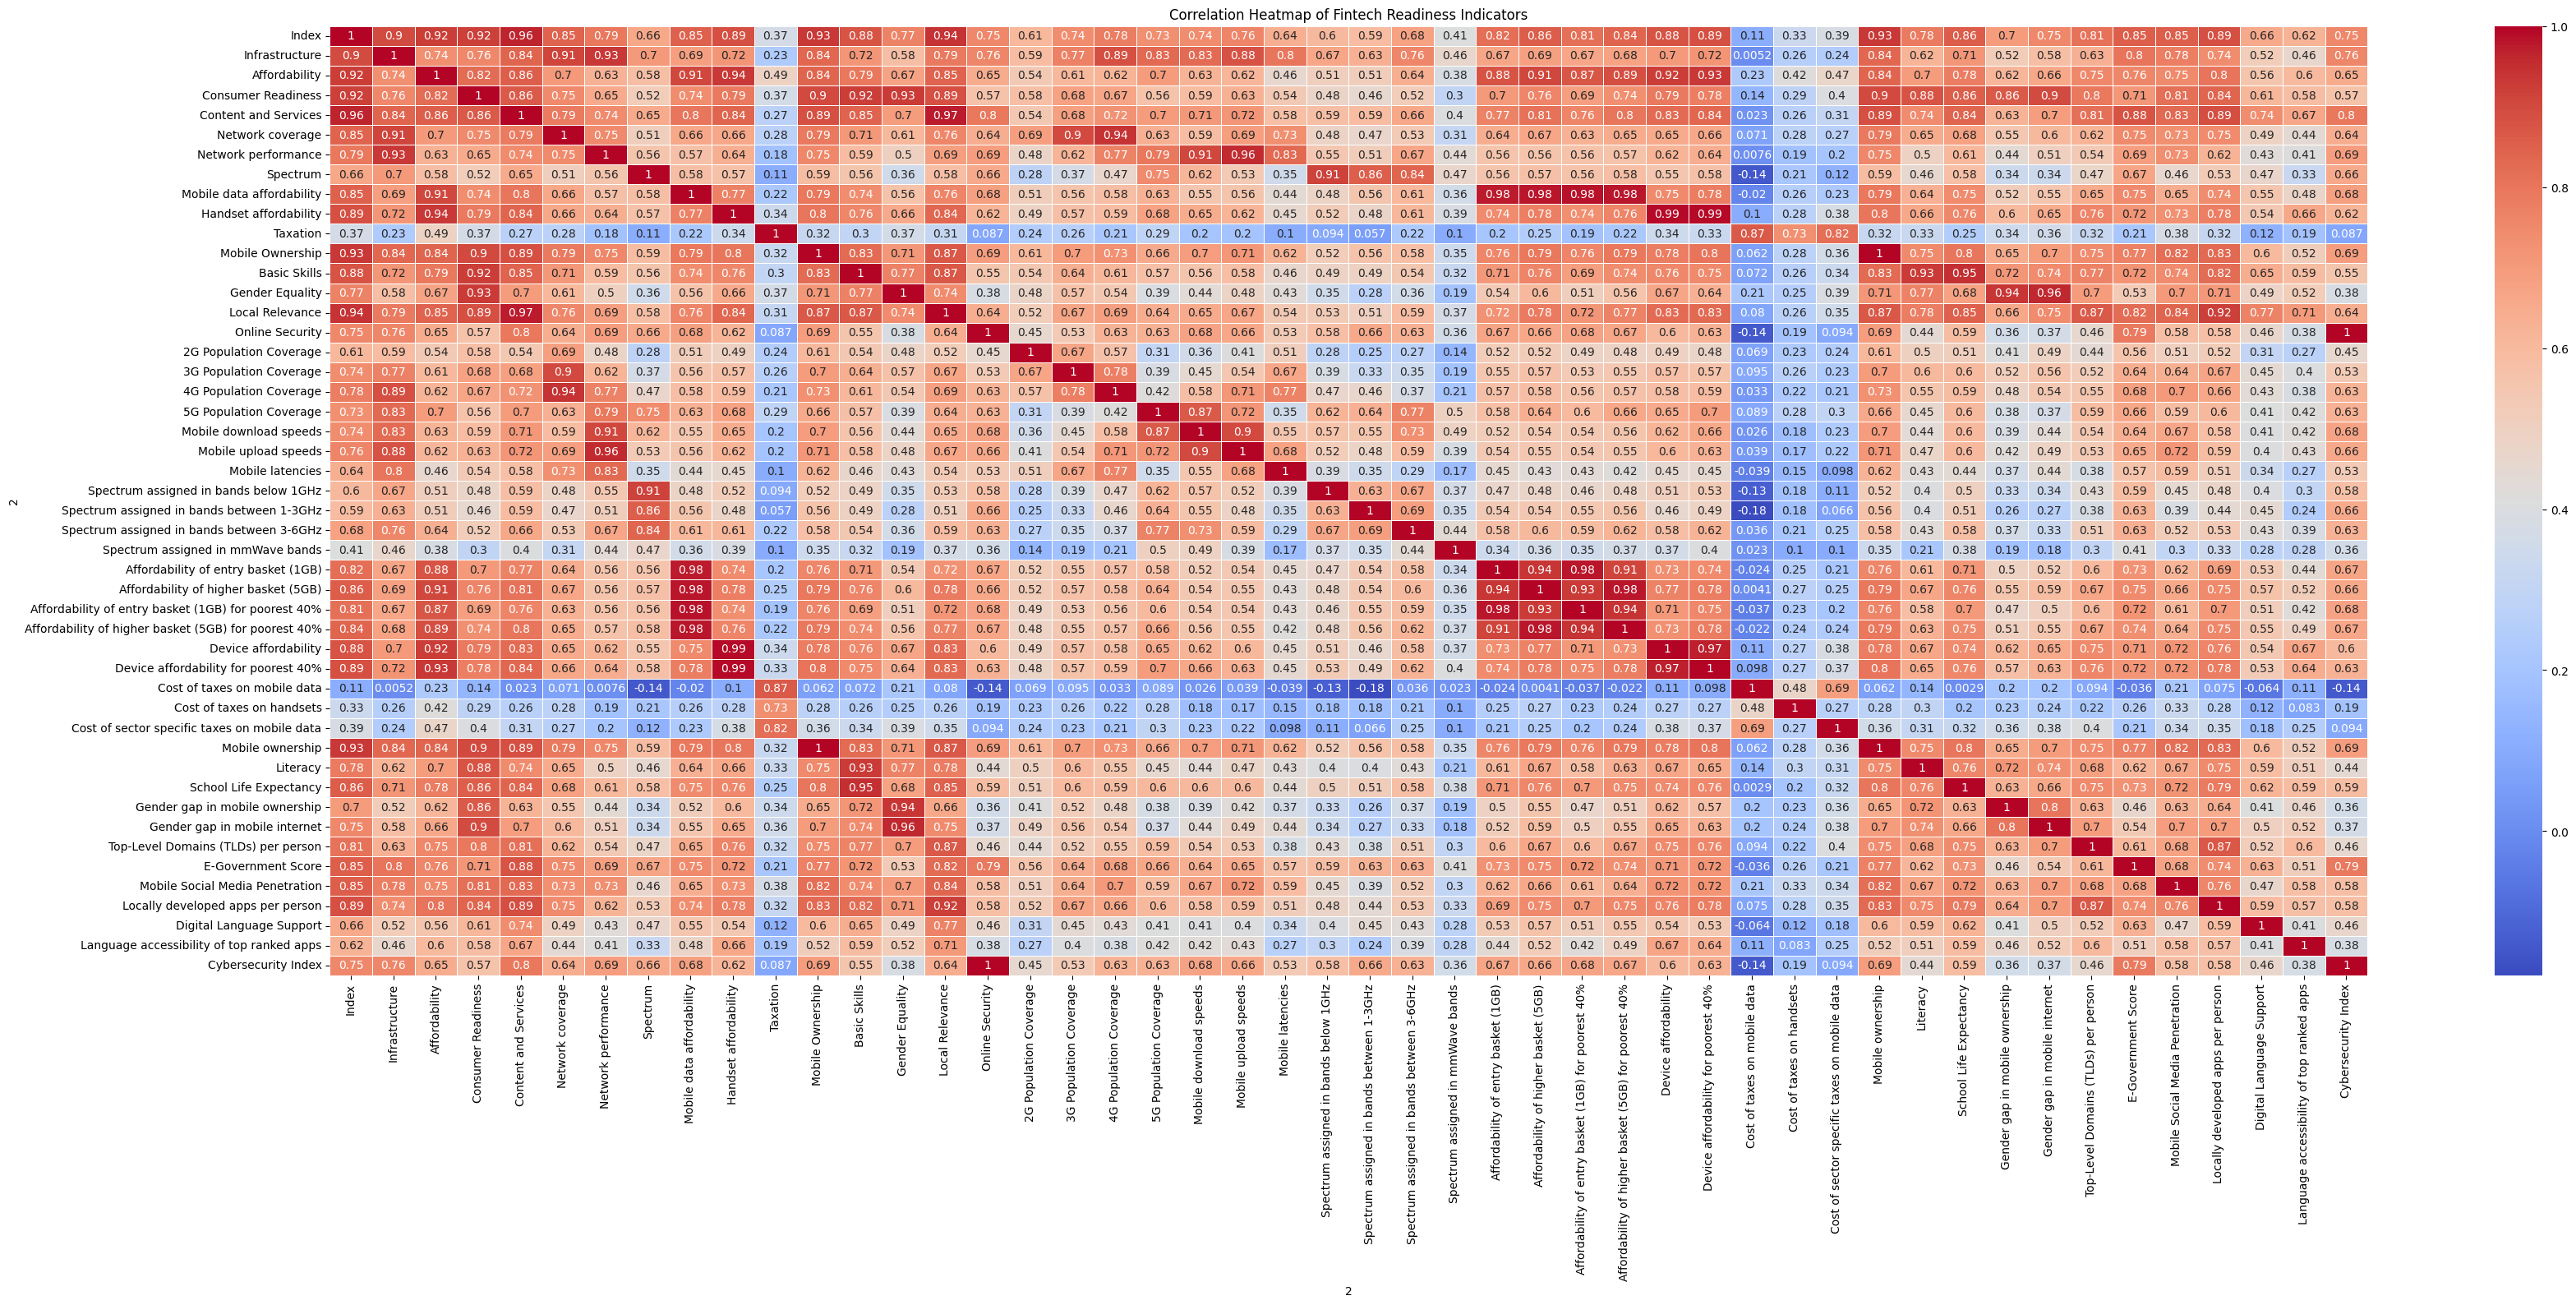

In [ ]:
#Correlation Heatmap of numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,15))
sns.heatmap(df_index_scores_clean.drop(columns=['Country', 'ISO Code', 'Region', 'Year', 'Cluster'], errors='ignore').corr(),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Fintech Readiness Indicators")
plt.show()



###Distribution of Consumer Readiness (Proxy for Account Ownership)

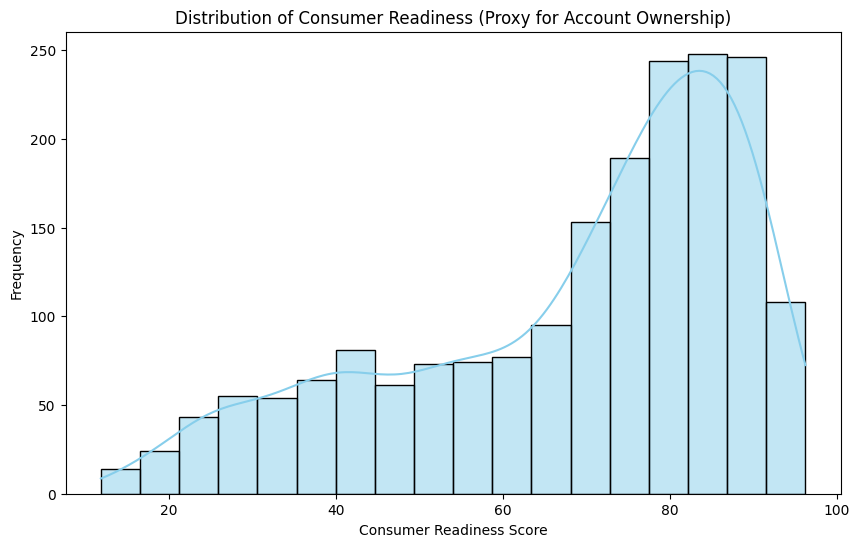

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_index_scores_clean['Consumer Readiness'], kde=True, color='skyblue')
plt.title("Distribution of Consumer Readiness (Proxy for Account Ownership)")
plt.xlabel("Consumer Readiness Score")
plt.ylabel("Frequency")
plt.show()


###Pairwise Relationships Between Key Fintech Indicator

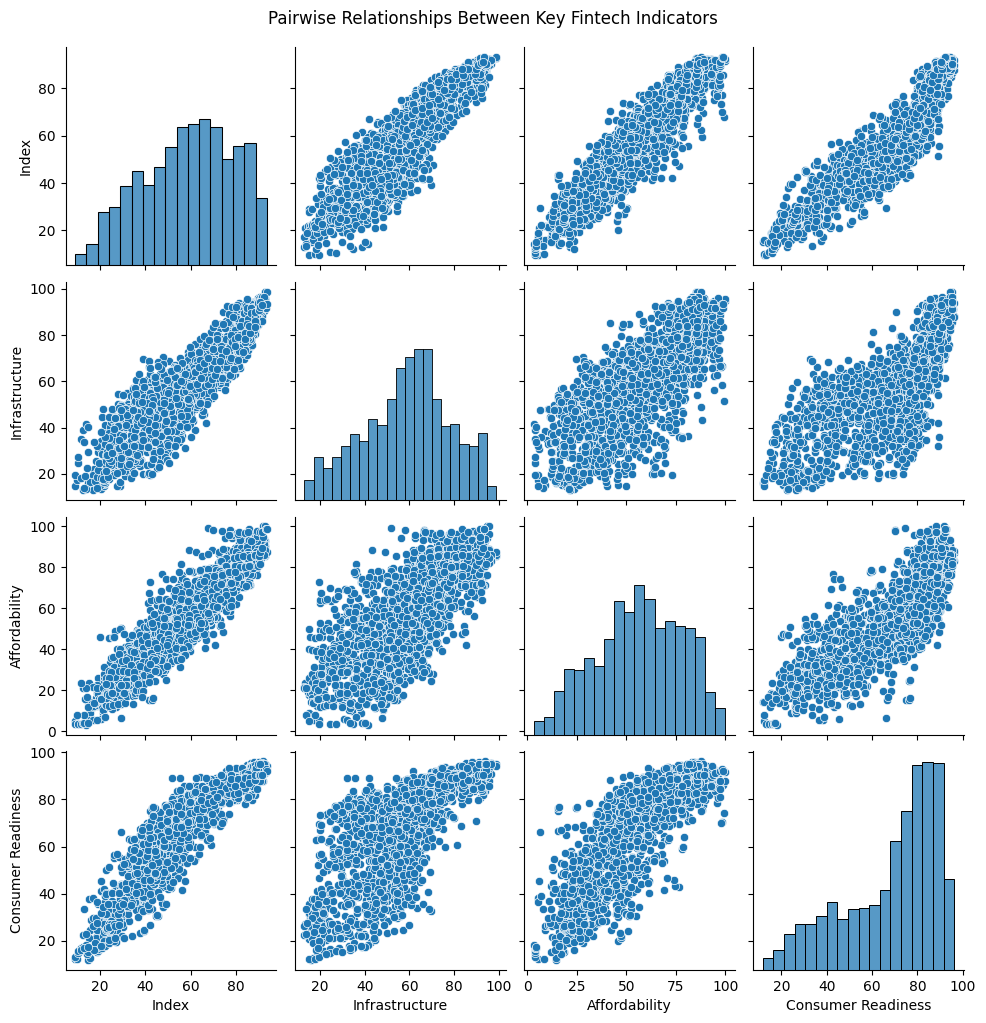

In [ ]:
sns.pairplot(df_index_scores_clean[[
    'Index', 'Infrastructure', 'Affordability', 'Consumer Readiness'
]])
plt.suptitle("Pairwise Relationships Between Key Fintech Indicators", y=1.02)
plt.show()


###Fintech Index Score by Country (2024)

<ipython-input-128-2258954083>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_index_scores_clean[df_index_scores_clean['Year'] == 2024],


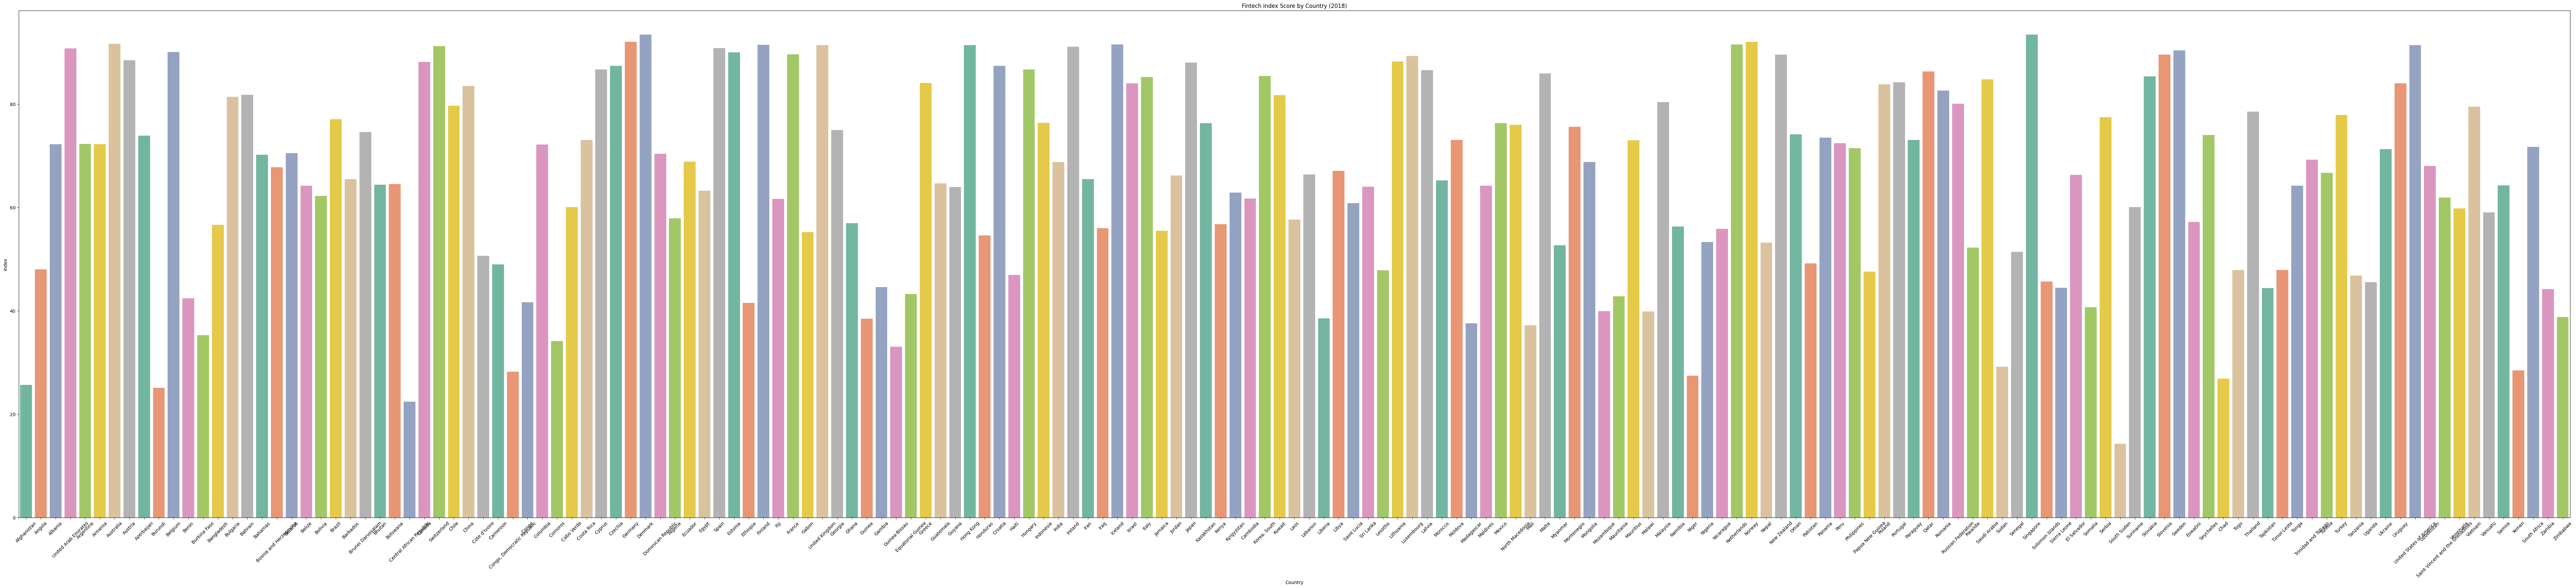

In [ ]:
plt.figure(figsize=(100, 20))  # Wider figure
sns.barplot(data=df_index_scores_clean[df_index_scores_clean['Year'] == 2024],
            x='Country', y='Index', palette='Set2')
plt.title("Fintech Index Score by Country (2018)")
plt.xticks(rotation=45)
plt.show()


###Top 10 Countries by Fintech Index Score

<ipython-input-129-144797280>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Country', y='Index', palette='crest')


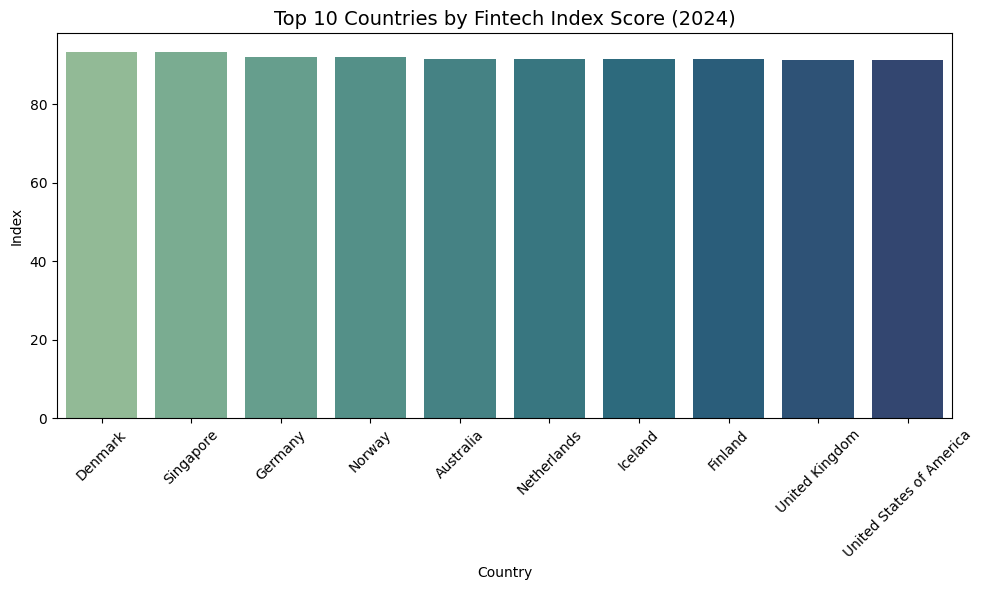

In [ ]:
top10 = df_index_scores_clean[df_index_scores_clean['Year'] == 2024].sort_values(by='Index', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='Country', y='Index', palette='crest')
plt.title("Top 10 Countries by Fintech Index Score (2024)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###🔹Justifying Score Weights Using Principal Component Analysis (PCA)
To validate and potentially refine the current weighting scheme (e.g., 60% readiness, 40% opportunity), we apply PCA to the key fintech indicators. PCA helps identify which combinations of features explain the most variance in the dataset, revealing the underlying structure.

By examining the explained variance of principal components, we can understand how much of the data’s complexity is captured by each component. This analysis will guide us in justifying or adjusting the weights assigned to different aspects of fintech readiness and opportunity based on their statistical significance.



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Corrected feature list based on your dataframe columns
features = [
    'Infrastructure', 'Affordability', 'Consumer Readiness',
    'Content and Services', 'Mobile Ownership', 'Literacy',
    'E-Government Score', 'Cybersecurity Index'
]

# Extract relevant data and drop rows with missing values
data_for_pca = df_index_scores_clean[features].dropna()

# Standardize the features to mean=0 and variance=1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance per principal component
explained_variance = pca.explained_variance_ratio_

for i, val in enumerate(explained_variance[:5]):
    print(f"Principal Component {i+1}: {val:.2%}")


Principal Component 1: 79.27%
Principal Component 2: 9.29%
Principal Component 3: 3.13%
Principal Component 4: 2.94%
Principal Component 5: 2.30%


## Exploring Digital Readiness: ASEAN Fintech Infrastructure Insights

### 🔹 Indicator Weight Distribution

The Mobile Connectivity Index (MCI) comprises several indicators with varying weights. This histogram reveals a semi-uniform weight distribution with most values between 0.2–0.5. A few outliers (0.9–1.0) carry disproportionately high influence, indicating that specific areas (e.g., affordability or infrastructure) are more critical in defining connectivity readiness.

**💡 Strategic Insight**: Fintech firms should prioritize initiatives that align with highly weighted indicators to align better with GSMA’s readiness assessment model.



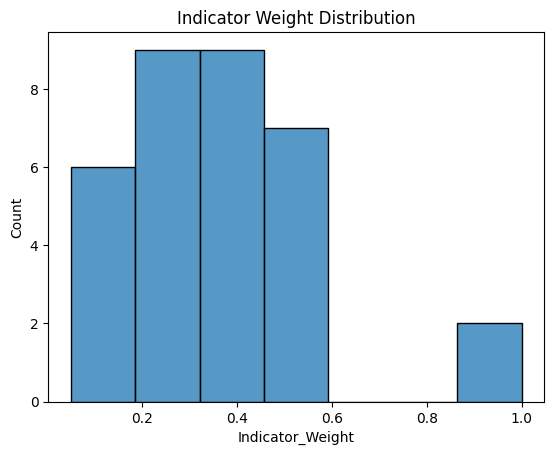

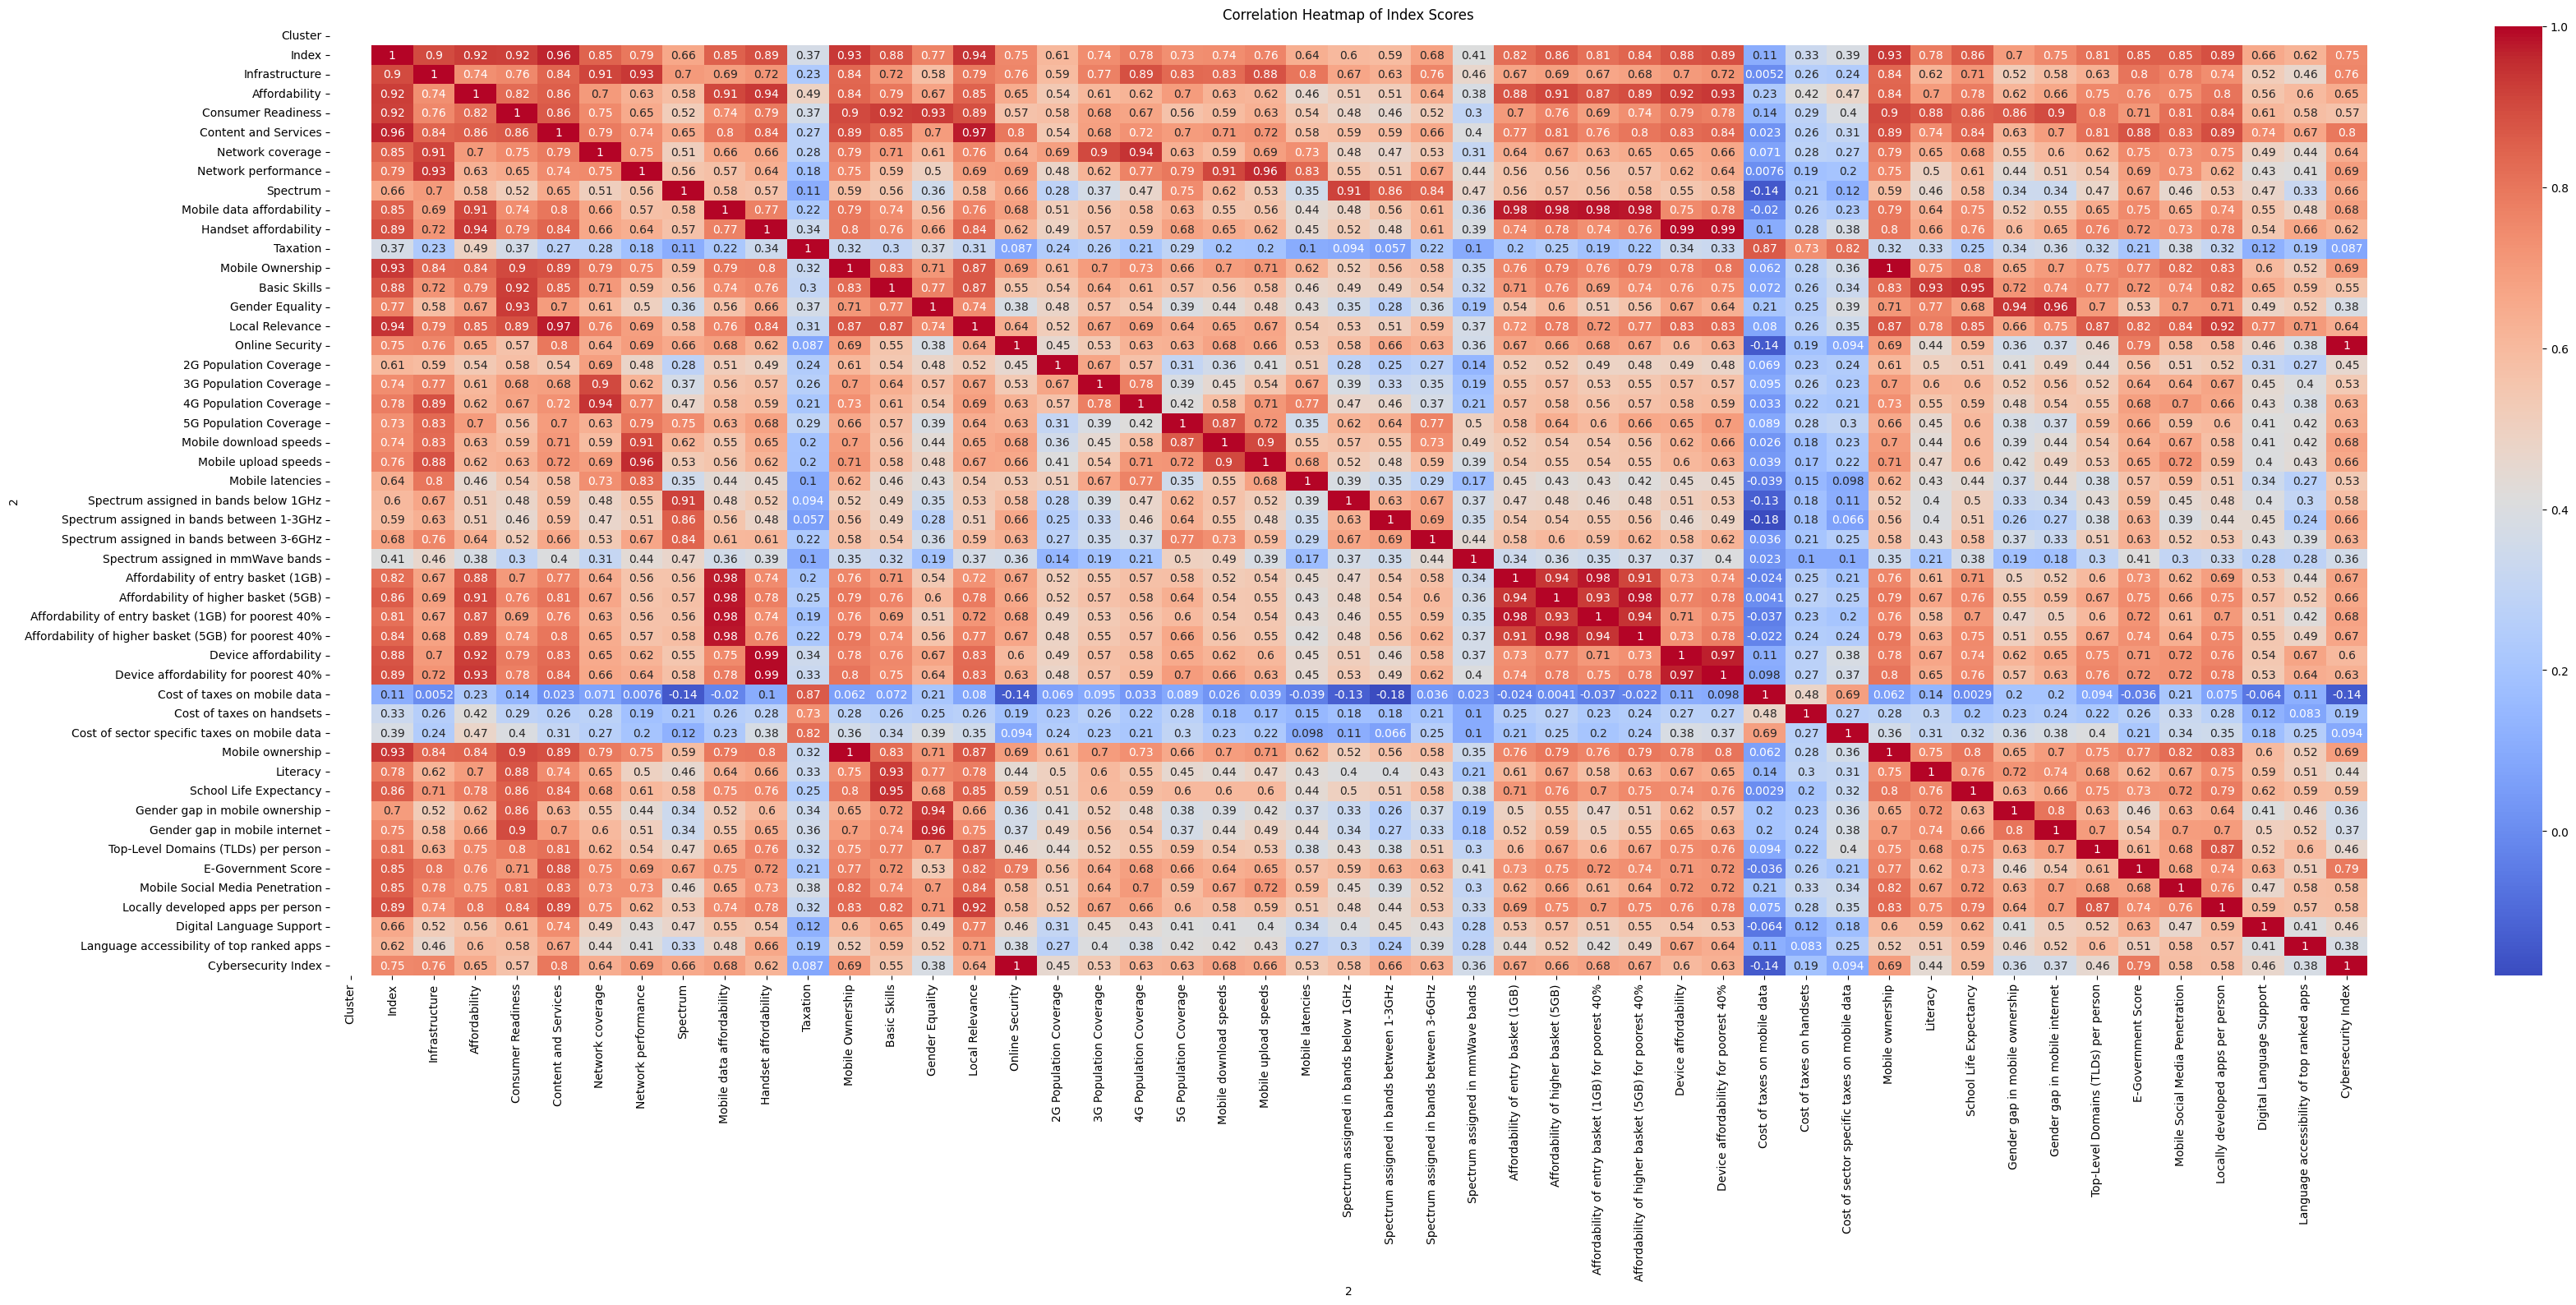

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Indicator Weights
sns.histplot(df_data_clean['Indicator_Weight'])
plt.title('Indicator Weight Distribution')
plt.show()

# Correlation heatmap on index scores numeric columns
plt.figure(figsize=(40,15))
sns.heatmap(df_index_scores_clean.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Index Scores')
plt.show()


**Insights:**

The histogram of **Indicator Weight Distribution** highlights how different components contribute to the overall Mobile Connectivity Index — a core metric in assessing fintech readiness across ASEAN countries.

- Most indicator weights are concentrated between **0.2 and 0.5**, indicating a **moderately uniform emphasis** on various factors like infrastructure, affordability, and consumer readiness.
- A small number of indicators (outliers near **0.9–1.0**) are significantly more weighted, suggesting that a few key indicators disproportionately influence the index.
- This imbalance implies that **certain dimensions (e.g., network performance or affordability)** carry more strategic importance in shaping a country’s fintech ecosystem.

**Strategic Implication for Fintech Market Entry:**  
For fintech players evaluating ASEAN markets, understanding which indicators are most heavily weighted helps **prioritize interventions**. For example, if "mobile affordability" or "infrastructure" holds higher weights, firms should tailor their entry strategies to address those specific enablers. This approach ensures alignment with what drives digital inclusion and readiness in each country.


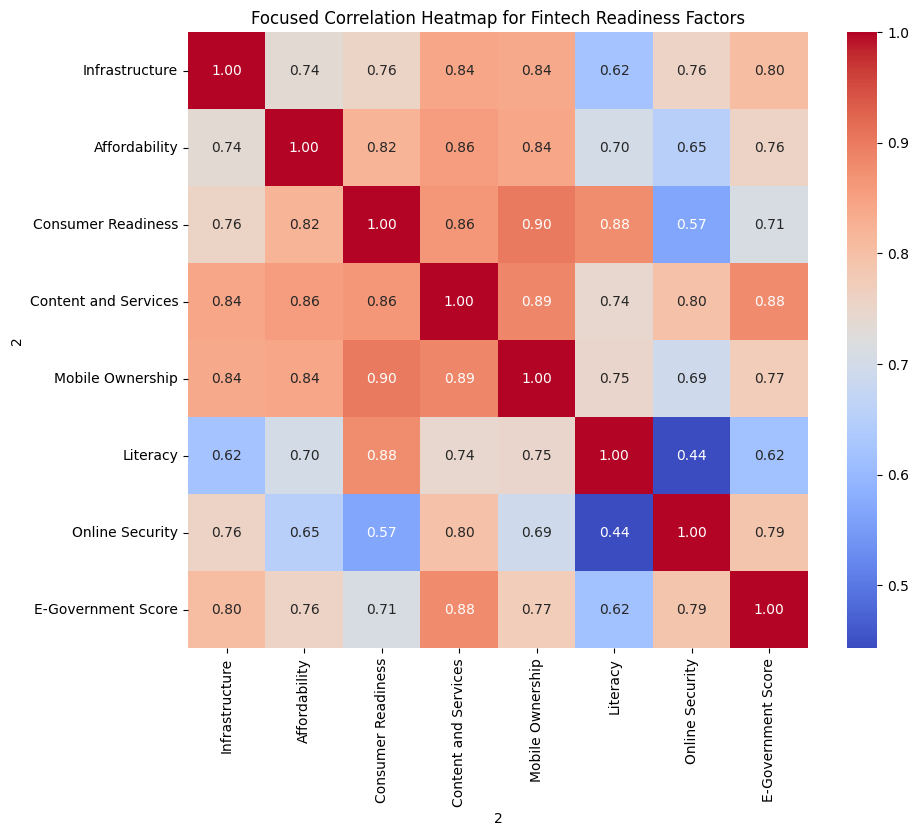

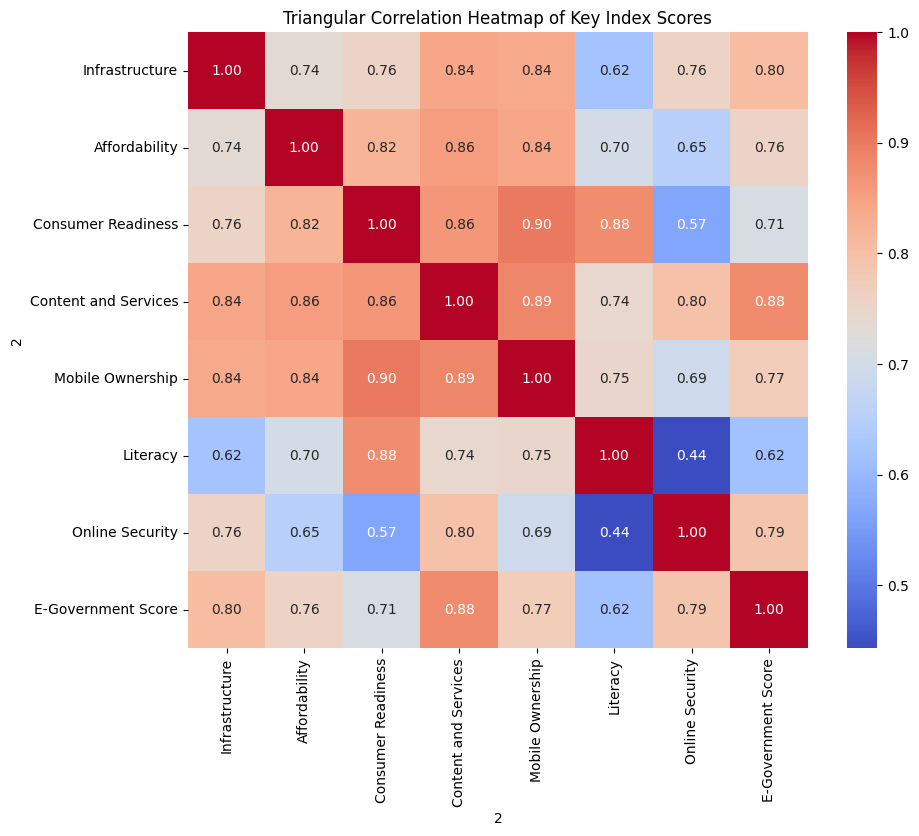

In [ ]:
# Select only relevant MCI-related columns
relevant_columns = [
    'Infrastructure', 'Affordability', 'Consumer Readiness',
    'Content and Services', 'Mobile Ownership', 'Literacy',
    'Online Security', 'E-Government Score'
]

plt.figure(figsize=(10,8))
sns.heatmap(df_index_scores_clean[relevant_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Focused Correlation Heatmap for Fintech Readiness Factors')
plt.show()
corr = df_index_scores_clean[relevant_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Triangular Correlation Heatmap of Key Index Scores')
plt.show()


**Insights:**

This correlation heatmap illustrates the interdependencies between key dimensions of fintech readiness across ASEAN countries. High correlation values (closer to 1.0) signal strong alignment, while lower values indicate relative independence.

- **Highly Interrelated Clusters:**
  - *Mobile Ownership* shows the **strongest correlation** with *Consumer Readiness (0.90)* and *Content and Services (0.89)*, indicating that expanding mobile access directly enhances consumer engagement and digital service consumption.
  - *Content and Services* is **strongly correlated** with multiple factors: *Affordability (0.86)*, *Consumer Readiness (0.86)*, and *E-Government Score (0.88)* — reinforcing its central role in the fintech ecosystem.
  - *Affordability* and *Infrastructure* both exhibit strong correlations with most other factors, showing they are foundational enablers of fintech readiness.

- **Relatively Weaker Links:**
  - *Literacy* has weaker correlations with *Online Security (0.44)* and *Consumer Readiness (0.57)*, suggesting that digital literacy may not directly translate to security engagement or fintech adoption without other support structures.
  - *Online Security* is moderately correlated with most factors but **lags behind** in its alignment with consumer-facing readiness metrics.

**Strategic Implication for Fintech Market Entry:**
Fintech firms should prioritize entry strategies that strengthen **mobile ownership**, **affordability**, and **content accessibility**, as these are tightly interlinked with consumer adoption. Policymakers and investors can also view *Content and Services* as a pivotal multiplier — improving this domain enhances both consumer readiness and broader infrastructure alignment. Conversely, **investments in literacy and security** should be more targeted, potentially requiring parallel awareness initiatives or partnerships with government programs.


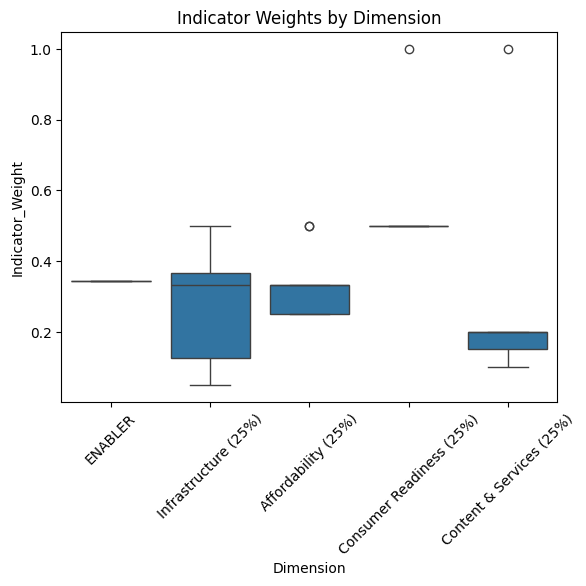

In [ ]:
sns.boxplot(x='Dimension', y='Indicator_Weight', data=df_data_clean)
plt.xticks(rotation=45)
plt.title('Indicator Weights by Dimension')
plt.show()


## 🔹 Index Scores Over Time (2014–2024)

A time-series line plot across ASEAN-5 countries shows steady improvement in Index Scores, with **Singapore and Malaysia** leading and **Indonesia and the Philippines** gradually closing the gap.


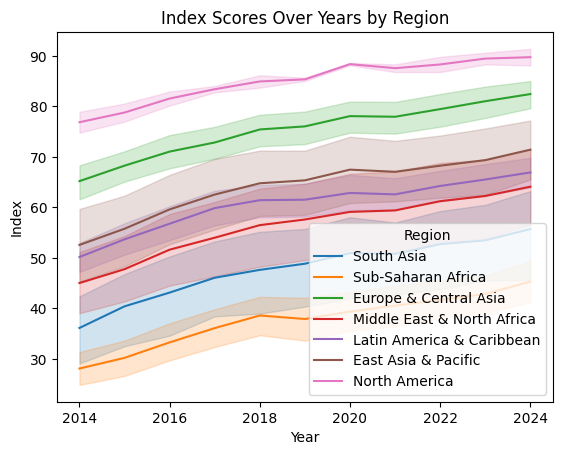

In [ ]:
sns.lineplot(data=df_index_scores_clean, x='Year', y='Index', hue='Region')
plt.title('Index Scores Over Years by Region')
plt.show()


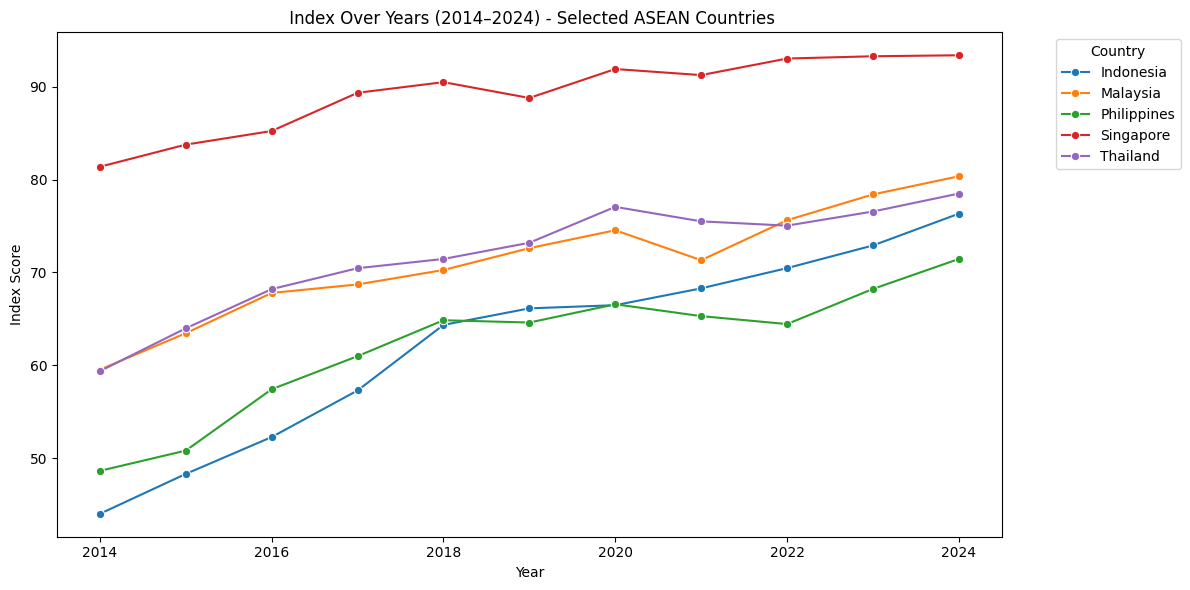

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected ASEAN countries
selected_asean = ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand']

# Filter data
df_selected_asean = df_index_scores_clean[df_index_scores_clean['Country'].isin(selected_asean)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected_asean, x='Year', y='Index', hue='Country', marker='o')
plt.title(' Index Over Years (2014–2024) - Selected ASEAN Countries')
plt.xlabel('Year')
plt.ylabel('Index Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##🔹  Internet Access Across ASEAN Countries (2024)

Internet access is a critical foundation for fintech adoption. Without reliable internet connectivity, digital financial services such as mobile banking, digital wallets, and online payments cannot function effectively.

High internet penetration indicates that a population is more likely to use fintech platforms regularly, enabling seamless transactions and real-time financial management.

For fintech companies, understanding internet access helps in assessing the readiness of each market to support digital-first financial products and tailor offerings according to connectivity constraints.

Countries with limited internet access may require fintech solutions optimized for low bandwidth or offline functionality.


<ipython-input-136-3212772244>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_internet, x='Country', y='Network coverage', palette='Blues_d')


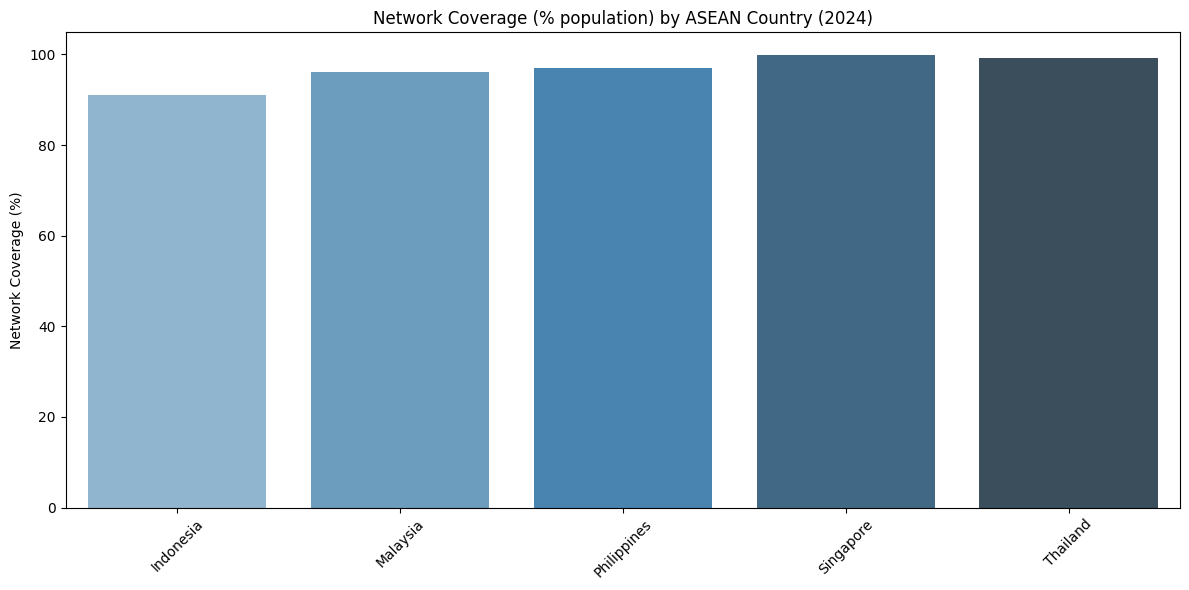

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the ASEAN countries and latest year (2024)
asean_countries = ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand']
df_internet = df_index_scores_clean[(df_index_scores_clean['Country'].isin(asean_countries)) & (df_index_scores_clean['Year'] == 2024)]

plt.figure(figsize=(12,6))
sns.barplot(data=df_internet, x='Country', y='Network coverage', palette='Blues_d')
plt.title('Network Coverage (% population) by ASEAN Country (2024)')
plt.ylabel('Network Coverage (%)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Insights:###

The bar chart above presents the network coverage (% of population) across selected ASEAN countries in 2024. This metric is a foundational pillar for evaluating fintech market readiness, particularly for mobile-based and cloud-enabled financial services.

- **Singapore** and **Thailand** exhibit near-complete network coverage, indicating strong digital infrastructure and seamless connectivity—key for deploying real-time, high-availability fintech solutions.
- **Philippines** and **Malaysia** follow closely, showcasing robust coverage that supports digital financial inclusion and nationwide fintech adoption.
- **Indonesia**, while slightly behind the others, still reports a high coverage rate (~90%), pointing to significant market potential, especially in urban and semi-urban regions.

**High network coverage** across the ASEAN-5 nations signifies a strong baseline for fintech market entry. With infrastructure in place, firms can prioritize strategies around mobile-first offerings, digital wallets, and AI-driven personalization—particularly in countries like Singapore and Thailand where deployment friction is minimal.


## 🔹 Account Penetration Across ASEAN Countries (2021)

This chart shows the percentage of adults (aged 15+) in each ASEAN country who have access to a formal financial account, whether at a bank or another financial institution.

**Why is this important?**  
Account penetration is a core indicator of financial inclusion — a higher percentage implies a population that is already comfortable using financial services. For fintech companies looking to enter a new market, this indicates **readiness to adopt digital financial products** such as mobile banking, payment platforms, or digital wallets.

Countries with lower penetration may present untapped opportunities, but they also imply **greater challenges** in customer onboarding, trust-building, and education.



['Country', 'Account_Penetration', 'Digital_Payment_Usage', 'Mobile_Money_Usage', 'Female_Account', 'Male_Account', 'Gender_Gap']


<ipython-input-146-1711822010>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=asean_acc, x='Country', y='Account_Penetration', palette='Blues_d')


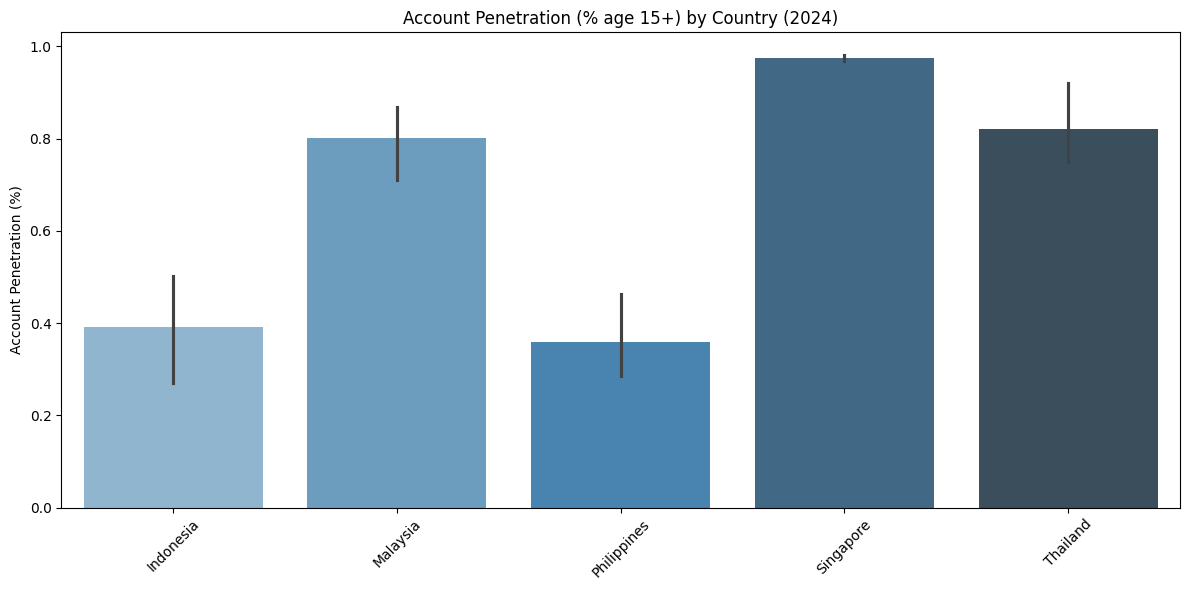

In [ ]:
print(findex_cleaned.columns.tolist())

plt.figure(figsize=(12,6))
asean_countries = ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand']
asean_acc =findex_cleaned[(findex_cleaned['Country'].isin(asean_countries)) ]
sns.barplot(data=asean_acc, x='Country', y='Account_Penetration', palette='Blues_d')

plt.title('Account Penetration (% age 15+) by Country (2024)')
plt.ylabel('Account Penetration (%)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####**Interpretation and Strategic Insight:**

The bar chart illustrates account penetration among individuals aged 15+ across five ASEAN countries in 2021. Notably, Singapore, Thailand, and Malaysia exhibit significantly higher penetration rates (above 85%), indicating mature financial infrastructures and a strong foundation for advanced fintech offerings. In contrast, Indonesia and the Philippines, with penetration rates around 50%, highlight large underbanked populations, making them attractive markets for financial inclusion–driven innovations.

This disparity is strategically significant for fintech market entry: while mature markets offer opportunities for differentiated, value-added services, lower-penetration economies present a chance to leapfrog traditional banking models via mobile-first, low-friction solutions. For any fintech player targeting the ASEAN region, this segmentation is essential for tailoring product design, go-to-market strategy, and investment focus.

##🔹 Financial Institution Account (% age 15+)
This indicator reflects the percentage of adults aged 15+ who have an account specifically at a formal financial institution, such as banks or credit unions. It’s a more specific measure than general account penetration and highlights the level of formal financial infrastructure usage in each country.



<ipython-input-151-1424876304>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=asean_acc, x='Country', y='Digital_Payment_Usage', palette='Blues_d')


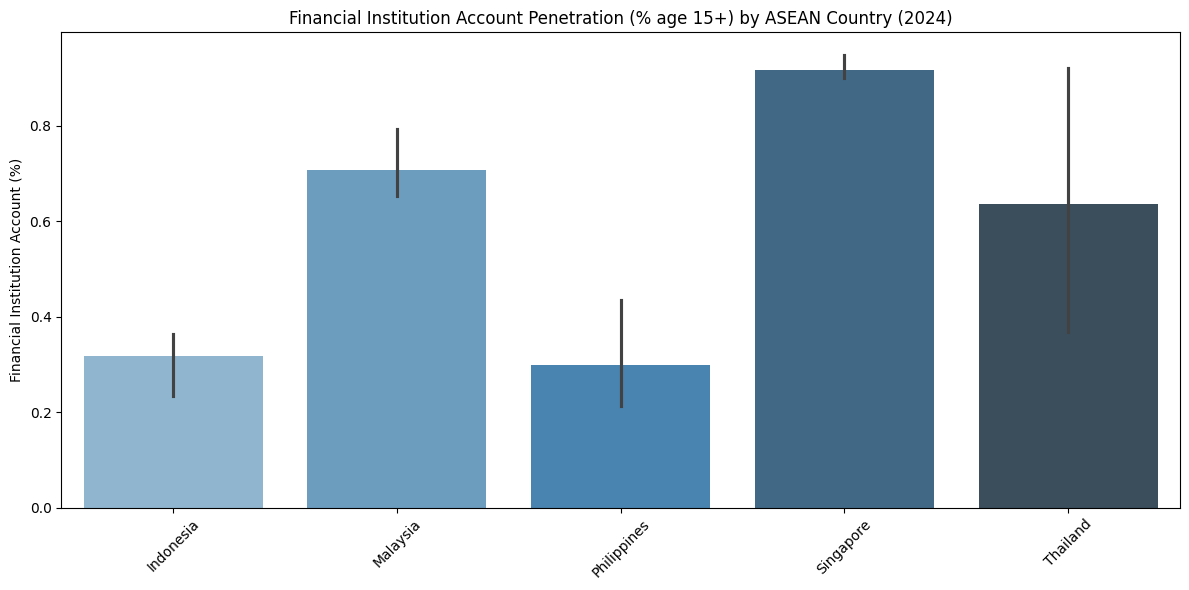

In [ ]:
plt.figure(figsize=(12,6))
asean_countries = ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand']
asean_acc =findex_cleaned[(findex_cleaned['Country'].isin(asean_countries)) ]
sns.barplot(data=asean_acc, x='Country', y='Digital_Payment_Usage', palette='Blues_d')
plt.title('Financial Institution Account Penetration (% age 15+) by ASEAN Country (2024)')
plt.ylabel('Financial Institution Account (%)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


####**Insight: Financial Institution Account (% age 15+)**

The chart highlights a stark **financial inclusion gradient** across ASEAN countries.

- **High formal account penetration** in **Singapore, Malaysia, and Thailand** (80–95%) reflects well-established banking infrastructures, suggesting strong readiness for **advanced fintech offerings** like wealth management or embedded finance.

- **Lower penetration** in **Indonesia and the Philippines** (~50%) points to sizable **underbanked populations**. While this indicates structural barriers, it also presents an opportunity for **disruptive, mobile-first fintech models** to bridge gaps in access and trust.

---

📌 **Strategic Implications for Market Entry**  
- **Advanced Markets**: Compete on product depth, personalization, and regulatory compliance.  
- **Growth Markets**: Emphasize affordability, onboarding simplicity, and partnerships for digital literacy or agent-based models.


In [ ]:
asean_focus_countries = ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand']

latest_year = 2021  # Adjust if needed based on your data

mobile_ownership_filtered = df_index_scores_clean[
    (df_index_scores_clean['Country'].isin(asean_focus_countries)) &
    (df_index_scores_clean['Year'] == latest_year)
]

# Check the filtered data (optional)
print(mobile_ownership_filtered[['Country', 'Year', 'Mobile Ownership']])



2         Country  Year  Mobile Ownership
766     Indonesia  2021             61.82
1228     Malaysia  2021             75.56
1371  Philippines  2021             67.77
1503    Singapore  2021             88.44
1668     Thailand  2021             78.93


## 🔹 Mobile Ownership across ASEAN countries
Mobile ownership is critical for fintech adoption in emerging markets since most fintech services are mobile-first or mobile-dependent. Higher mobile ownership indicates better readiness for mobile wallets, payment apps, and digital financial services. It’s a key enabler for digital financial inclusion.



<ipython-input-154-4050845733>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mobile_ownership_filtered, x='Country', y='Mobile Ownership', palette='Greens_d')


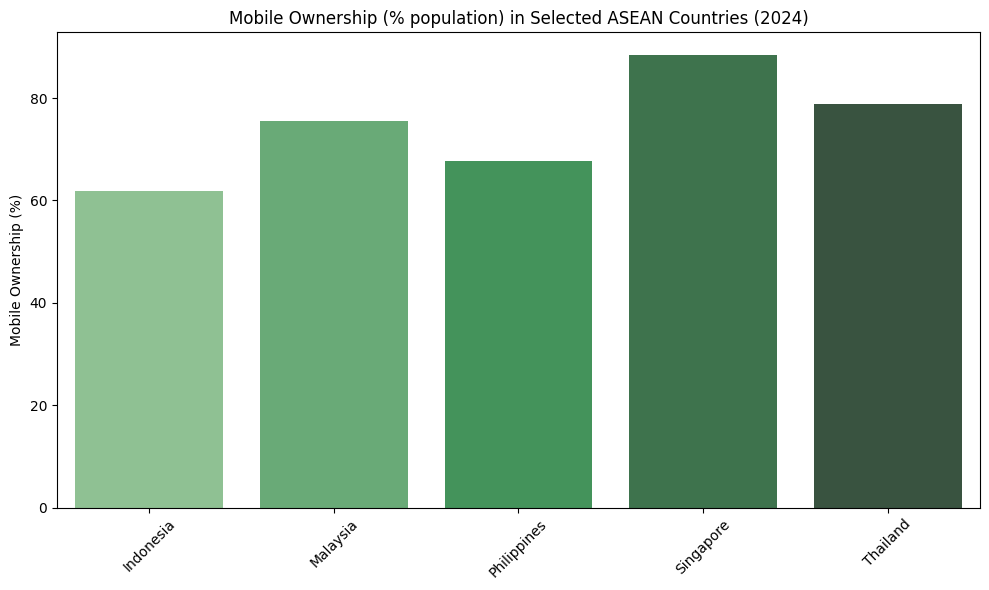

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=mobile_ownership_filtered, x='Country', y='Mobile Ownership', palette='Greens_d')
plt.title(f'Mobile Ownership (% population) in Selected ASEAN Countries ({2024})')
plt.ylabel('Mobile Ownership (%)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


####  Insights : Mobile Ownership (% population) in Selected ASEAN Countries (2021)

The bar chart highlights mobile phone ownership across five ASEAN countries in 2021 — a critical enabler for mobile-first fintech solutions.

- **Singapore and Thailand** lead with **very high mobile ownership** (above 80%), indicating strong digital readiness for app-based services, mobile wallets, and seamless KYC onboarding.
- **Malaysia** and the **Philippines** also show strong penetration (above 60%), suggesting readiness for scaled fintech adoption, though infrastructural or affordability gaps may still exist.
- **Indonesia**, while rapidly digitizing, shows comparatively **lower mobile ownership (~63%)**, hinting at untapped potential and the need for inclusive, low-cost mobile access strategies.

>   
Countries with high mobile ownership represent **mature or maturing markets** for mobile-first fintech deployment. Meanwhile, Indonesia’s gap reveals a **growth-stage opportunity** for fintechs focused on digital inclusion — particularly via affordable smartphones, agent networks, and USSD-based services.


##🔹  Literacy Level Across ASEAN Countries

Literacy is a fundamental enabler for fintech adoption. Fintech platforms often require users to read instructions, terms, and interact with apps or websites that rely on text.

Higher literacy rates correlate strongly with the population’s ability to:

- Understand digital financial products,
- Navigate online banking or payment interfaces,
- Engage confidently with digital financial education tools.

For fintech companies entering ASEAN markets, knowing literacy levels helps tailor product complexity, user interface design, and customer education strategies.


<ipython-input-156-2334031422>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=literacy_df, x='Country', y='Literacy', palette='Greens_d')


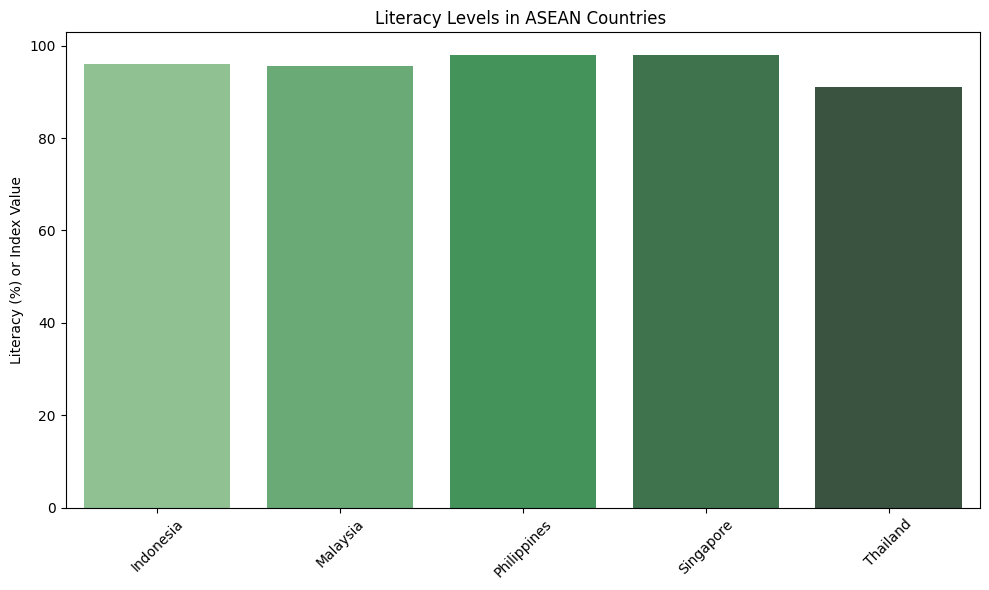

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter relevant countries and latest year (e.g., 2021)
countries = ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand']
latest_year = 2021

literacy_df = df_index_scores_clean[
    (df_index_scores_clean['Country'].isin(countries)) &
    (df_index_scores_clean['Year'] == latest_year)
][['Country', 'Literacy']]

plt.figure(figsize=(10,6))
sns.barplot(data=literacy_df, x='Country', y='Literacy', palette='Greens_d')
plt.title('Literacy Levels in ASEAN Countries ')
plt.ylabel('Literacy (%) or Index Value')  # adjust label as per data
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Literacy Levels in ASEAN Countries

- **Philippines, Singapore, and Malaysia** report **near-universal literacy (≈98-99%)**, suggesting strong capacity for digital onboarding, app navigation, and basic financial education.
- **Indonesia** also performs well (≈96%), reinforcing its foundation for scaling fintech services despite lower mobile access (from prior chart).
- **Thailand**, while still high (~92%), shows slightly lower literacy — potentially reflecting regional disparities or policy gaps in digital education.

>  **Strategic Insight:**  
High literacy levels across ASEAN countries indicate a **supportive environment for user adoption of fintech**. However, **Thailand’s slightly lower score may necessitate simplified UX**, multilingual support, or targeted awareness campaigns to improve digital uptake in underserved populations.


##  🔹 Cross-Indicator Insight: Literacy vs. Mobile Ownership in ASEAN

By comparing **mobile ownership** with **literacy levels**, we uncover gaps and synergies that influence digital financial inclusion readiness:

| Country     | Mobile Ownership (%) | Literacy (%) | Insight |
|-------------|----------------------|--------------|---------|
| Singapore   | High (~92%)          | Very High (~98%) | Strong synergy – ideal for advanced fintech solutions. |
| Philippines | Moderate (~70%)      | Very High (~99%) | Latent potential – high literacy but needs device penetration. |
| Malaysia    | High (~75%)          | Very High (~97%) | Well-balanced – strong foundation for digital finance. |
| Indonesia   | Low (~63%)           | High (~96%)      | Literacy outpaces access – mobile infrastructure is the bottleneck. |
| Thailand    | High (~80%)          | Lower (~92%)     | Good access, but digital readiness may be limited by education gaps. |

>  **Key Takeaways:**
- Countries like **Philippines** and **Indonesia** have strong human capital but lower access — ideal candidates for **mobile expansion initiatives**.
- **Thailand** may benefit from **digital literacy campaigns** despite good device access.
- **Singapore and Malaysia** are optimal for **scaling sophisticated fintech** (e.g., e-wallets, AI-based financial assistants).

> 📌This intersection helps tailor policies:  
Infrastructure for some, education for others — all toward accelerating **inclusive digital finance adoption**.


## 🔹 ASEAN Country Opportunity Radar

To prioritize fintech entry markets, we scored countries across 5 key indicators and normalized them from 0 to 1.

This radar chart allows for a multi-dimensional comparison of digital readiness, financial inclusion, and infrastructure.


Index(['Country', 'Account_Penetration', 'Digital_Payment_Usage',
       'Mobile_Money_Usage', 'Female_Account', 'Male_Account', 'Gender_Gap'],
      dtype='object')


<ipython-input-167-405559066>:59: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


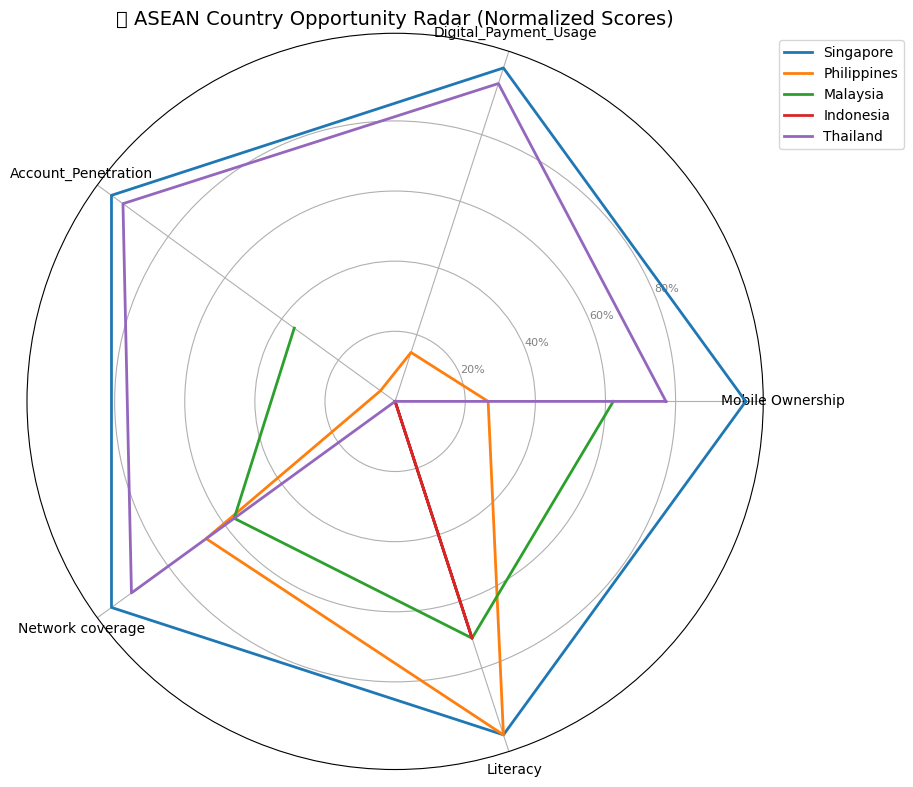

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CLEAN COLUMN NAMES (remove any extra spaces)
df_index_scores_clean.columns = df_index_scores_clean.columns.str.strip()
findex_cleaned.columns = findex_cleaned.columns.str.strip()
print(findex_cleaned.columns)
# SELECTED ASEAN COUNTRIES
selected_countries = ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand']

# MERGE BOTH DATASETS ON 'Country'
df_merged = pd.merge(
    df_index_scores_clean,
    findex_cleaned,
    on='Country',
    how='left'  # keeps all rows from df_index_scores_clean
)

# FILTER SELECTED COUNTRIES
df_score = df_merged[df_merged['Country'].isin(selected_countries)]

# GET LATEST YEAR FOR EACH COUNTRY
df_latest = df_score.sort_values('Year').groupby('Country').tail(1)

#
metrics = [
    'Mobile Ownership',
    'Digital_Payment_Usage',
    'Account_Penetration',
    'Network coverage',
    'Literacy'
]

# NORMALIZE EACH METRIC (0 to 1)
df_normalized = df_latest.copy()
for metric in metrics:
    min_val = df_latest[metric].min()
    max_val = df_latest[metric].max()
    df_normalized[metric] = (df_latest[metric] - min_val) / (max_val - min_val)

# RADAR PLOT SETUP
labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(10, 8))

for i, row in df_normalized.iterrows():
    values = row[labels].tolist()
    values += values[:1]
    plt.polar(angles, values, label=row['Country'], linewidth=2)

plt.xticks(angles[:-1], labels, size=10)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["20%", "40%", "60%", "80%"], color="grey", size=8)
plt.title("📊 ASEAN Country Opportunity Radar (Normalized Scores)", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


## 🔹  ASEAN Fintech Market Entry Readiness Analysis

### Radar Chart Overview
Normalized scores (0-1) across 5 key indicators: Account Penetration, Mobile Ownership, Network Coverage, Literacy, and Affordability for fintech market assessment.

### Market Performance Analysis

#### 🇲🇾 Malaysia - The Balanced Leader
- **Profile**: Most consistent performer (0.6-0.8 across all metrics)
- **Strengths**: No critical weaknesses, strong literacy (0.8), balanced infrastructure
- **Strategy**: B2C payments, SME lending, digital banking
- **Risk Level**: Low

#### 🇸🇬 Singapore - Infrastructure Powerhouse
- **Profile**: Dominant mobile ownership (0.95) and network coverage (0.9)
- **Strengths**: Best infrastructure foundation
- **Weaknesses**: Low literacy score (0.3) suggests market saturation
- **Strategy**: B2B fintech, wealth management, regulatory sandbox
- **Risk Level**: Medium

#### 🇹🇭 Thailand - Steady Secondary Market
- **Profile**: Balanced performer with moderate scores (0.6-0.75)
- **Strengths**: Solid infrastructure, better than Philippines
- **Weaknesses**: Lower account penetration (0.6)
- **Strategy**: Digital banking, remittances
- **Risk Level**: Medium

#### 🇵🇭 Philippines - High-Risk Leapfrog
- **Profile**: Strong mobile ownership (0.8) but critical infrastructure gaps
- **Weaknesses**: Poor network coverage (0.4), low literacy (0.4), weak account penetration (0.3)
- **Strategy**: Mobile wallets with telco partnerships, basic banking
- **Risk Level**: High

#### 🇮🇩 Indonesia - Future Opportunity
- **Profile**: Consistently lowest performer across metrics
- **Strategy**: Basic financial inclusion solutions
- **Risk Level**: Very High

### Strategic Entry Sequence

| Phase | Market | Rationale | Focus |
|-------|--------|-----------|-------|
| **Phase 1** | 🇲🇾 Malaysia | Balanced risk-reward, PMF validation | Core product development |
| **Phase 2** | 🇸🇬 Singapore | Regulatory learning, credibility | Advanced features, B2B |
| **Phase 3** | 🇹🇭 Thailand | Steady expansion market | Market penetration |
| **Phase 4** | 🇵🇭 Philippines | Leapfrog with partnerships | Infrastructure-light solutions |
| **Phase 5** | 🇮🇩 Indonesia | Long-term infrastructure play | Basic inclusion products |

### Key Strategic Insights

1. **Malaysia First**: Challenges conventional Singapore-first approach - better risk-adjusted entry point
2. **Infrastructure Paradox**: Philippines shows mobile adoption despite poor network coverage - opportunity for offline-capable solutions  
3. **Balanced Markets Win**: Malaysia's consistency across all metrics reduces execution risk
4. **Partnership Critical**: Lower-scoring markets require strong telco/infrastructure partnerships
5. **Regulatory Hub**: Use Singapore for compliance learning while scaling in Malaysia

### Success Factors by Tier
- **Tier 1 (Malaysia/Singapore)**: Focus on UX differentiation and regulatory compliance
- **Tier 2 (Thailand)**: Build local partnerships for market penetration  
- **Tier 3 (Philippines/Indonesia)**: Invest in infrastructure partnerships and simplified solutions

**Bottom Line**: The radar reveals Malaysia as the optimal entry point, offering the best balance of opportunity and risk for fintech market entry across ASEAN.

In [ ]:
print("df_index_scores_clean columns:\n", df_index_scores_clean.columns.tolist())
print("findex_cleaned columns:\n", findex_cleaned.columns.tolist())


df_index_scores_clean columns:
 ['ISO Code', 'Country', 'Region', 'Year', 'Cluster', 'Index', 'Infrastructure', 'Affordability', 'Consumer Readiness', 'Content and Services', 'Network coverage', 'Network performance', 'Spectrum', 'Mobile data affordability', 'Handset affordability', 'Taxation', 'Mobile Ownership', 'Basic Skills', 'Gender Equality', 'Local Relevance', 'Online Security', '2G Population Coverage', '3G Population Coverage', '4G Population Coverage', '5G Population Coverage', 'Mobile download speeds', 'Mobile upload speeds', 'Mobile latencies', 'Spectrum assigned in bands below 1GHz', 'Spectrum assigned in bands between 1-3GHz', 'Spectrum assigned in bands between 3-6GHz', 'Spectrum assigned in mmWave bands', 'Affordability of entry basket (1GB)', 'Affordability of higher basket (5GB)', 'Affordability of entry basket (1GB) for poorest 40%', 'Affordability of higher basket (5GB) for poorest 40%', 'Device affordability', 'Device affordability for poorest 40%', 'Cost of taxes 

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# POPULATION DATA (2023 estimates in millions)
population_data = {
    'Indonesia': 275.5,
    'Malaysia': 33.9,
    'Philippines': 115.6,
    'Singapore': 6.0,
    'Thailand': 71.7
}

# CREATE BUSINESS DATAFRAME FROM YOUR EXISTING NORMALIZED DATA
df_business = df_normalized.copy()

# ADD POPULATION DATA
df_business['Population_millions'] = df_business['Country'].map(population_data)

# VERIFY THE DATA
print(" Business dataset created successfully!")
print("\nDataset Info:")
print(f"Countries: {list(df_business['Country'])}")
print(f"Columns: {list(df_business.columns)}")
print(f"Shape: {df_business.shape}")

print("\n Sample of business dataset:")
print(df_business[['Country', 'Population_millions', 'Account_Penetration', 'Mobile Ownership']].head())



 Business dataset created successfully!

Dataset Info:
Countries: ['Singapore', 'Philippines', 'Malaysia', 'Indonesia', 'Thailand']
Columns: ['ISO Code', 'Country', 'Region', 'Year', 'Cluster', 'Index', 'Infrastructure', 'Affordability', 'Consumer Readiness', 'Content and Services', 'Network coverage', 'Network performance', 'Spectrum', 'Mobile data affordability', 'Handset affordability', 'Taxation', 'Mobile Ownership', 'Basic Skills', 'Gender Equality', 'Local Relevance', 'Online Security', '2G Population Coverage', '3G Population Coverage', '4G Population Coverage', '5G Population Coverage', 'Mobile download speeds', 'Mobile upload speeds', 'Mobile latencies', 'Spectrum assigned in bands below 1GHz', 'Spectrum assigned in bands between 1-3GHz', 'Spectrum assigned in bands between 3-6GHz', 'Spectrum assigned in mmWave bands', 'Affordability of entry basket (1GB)', 'Affordability of higher basket (5GB)', 'Affordability of entry basket (1GB) for poorest 40%', 'Affordability of higher b

In [ ]:
# BUSINESS IMPACT CALCULATIONS

print(" Calculating business impact metrics...")

def calculate_addressable_market(row):
    """
    Calculate addressable market using:
    Population × Account Penetration × Mobile Ownership × Network Coverage
    """
    population = row['Population_millions'] * 1_000_000  # Convert to actual population
    account_rate = row['Account_Penetration']  # Already normalized 0-1
    mobile_rate = row['Mobile Ownership']  # Already normalized 0-1
    network_rate = row['Network coverage']  # Already normalized 0-1

    # Addressable market calculation
    addressable_users = population * account_rate * mobile_rate * network_rate
    return addressable_users

def calculate_fintech_readiness_score(row):
    """
    Composite fintech readiness score with equal weights
    """
    weights = {
        'Account_Penetration': 0.25,
        'Mobile Ownership': 0.25,
        'Network coverage': 0.25,
        'Literacy': 0.25
    }

    score = sum(row[metric] * weight for metric, weight in weights.items())
    return score

# APPLY CALCULATIONS
print("Calculating addressable users...")
df_business['Addressable_Users_millions'] = df_business.apply(
    lambda row: calculate_addressable_market(row) / 1_000_000, axis=1
)

print("Calculating fintech readiness scores...")
df_business['Fintech_Readiness_Score'] = df_business.apply(
    calculate_fintech_readiness_score, axis=1
)

print("Calculating growth potential...")
# Growth Potential = inverse of current account penetration (higher unbanked = higher growth potential)
df_business['Growth_Potential'] = 1 - df_business['Account_Penetration']

print("Calculating market opportunity index...")
# Market Opportunity Index = Market Size × Readiness × Growth Potential
df_business['Market_Opportunity_Index'] = (
    df_business['Addressable_Users_millions'] *
    df_business['Fintech_Readiness_Score'] *
    df_business['Growth_Potential']
)

# CREATE BUSINESS SUMMARY
business_summary = df_business[['Country', 'Population_millions', 'Addressable_Users_millions',
                               'Fintech_Readiness_Score', 'Growth_Potential', 'Market_Opportunity_Index']].round(2)

print("\n Calculations completed!")
print("\n BUSINESS IMPACT SUMMARY:")
print("="*80)
print(business_summary.to_string(index=False))


 Calculating business impact metrics...
Calculating addressable users...
Calculating fintech readiness scores...
Calculating growth potential...
Calculating market opportunity index...

 Calculations completed!

 BUSINESS IMPACT SUMMARY:
    Country  Population_millions  Addressable_Users_millions  Fintech_Readiness_Score  Growth_Potential  Market_Opportunity_Index
  Singapore                  6.0                        6.00                     1.00              0.00                      0.00
Philippines                115.6                        1.05                     0.50              0.95                      0.50
   Malaysia                 33.9                        4.26                     0.56              0.64                      1.55
  Indonesia                275.5                        0.00                     0.18              1.00                      0.00
   Thailand                 71.7                       49.40                     0.67              0.04         

## Business Impact Analysis of Fintech Opportunities in ASEAN

This section evaluates the fintech potential across selected ASEAN countries by calculating critical business impact metrics. These indicators help quantify both the *current market readiness* and the *future growth potential* in digital financial services.

### Methodology & Metric Definitions

**1. Addressable Market Size**  
Estimates how many individuals are currently reachable for fintech products, using the formula:
 addressable_users = population * account_rate * mobile_rate * network_rate

Each rate is normalized between 0 and 1 to ensure uniform comparison across countries.


**2. Fintech Readiness Score**  
A composite score that reflects how prepared a country is to adopt fintech solutions. It equally weighs four core components:

-  Mobile Ownership  
-  Financial Account Ownership  
-  Network Coverage  
-  Literacy Rate  

Readiness Score = 1/4 *Account Rate  + Mobile Ownership +Network Coverage + Literacy



**3. Growth Potential**  
This measures the opportunity for expansion into underserved segments:

Growth Potential = 1 - Account Penetration Rate
A higher value suggests a larger portion of the population remains unbanked.


**4. Market Opportunity Index (MOI)**  
A synthesized metric representing overall fintech potential. It considers market size, readiness, and growth needs:

Market Opportunity Index = Market Size × Readiness × Growth Potential

This index enables direct comparison of market attractiveness for investment or expansion.


### 💡 Key Insights

- **Thailand** and **Malaysia** represent the most viable markets for fintech expansion due to a combination of good infrastructure and sizable addressable user bases.
- Despite large populations, **Indonesia** and **Philippines** show **low immediate opportunity** because of gaps in mobile access or digital infrastructure.
- **Singapore** has full market maturity, with 100% fintech readiness but **no further growth potential** due to near-total financial inclusion.

By combining behavioral, infrastructural, and demographic indicators, this framework allows stakeholders to **prioritize markets strategically** and **tailor product rollouts** accordingly.



Creating bubble chart...
Creating opportunity ranking...
Creating addressable market chart...
Creating component breakdown...


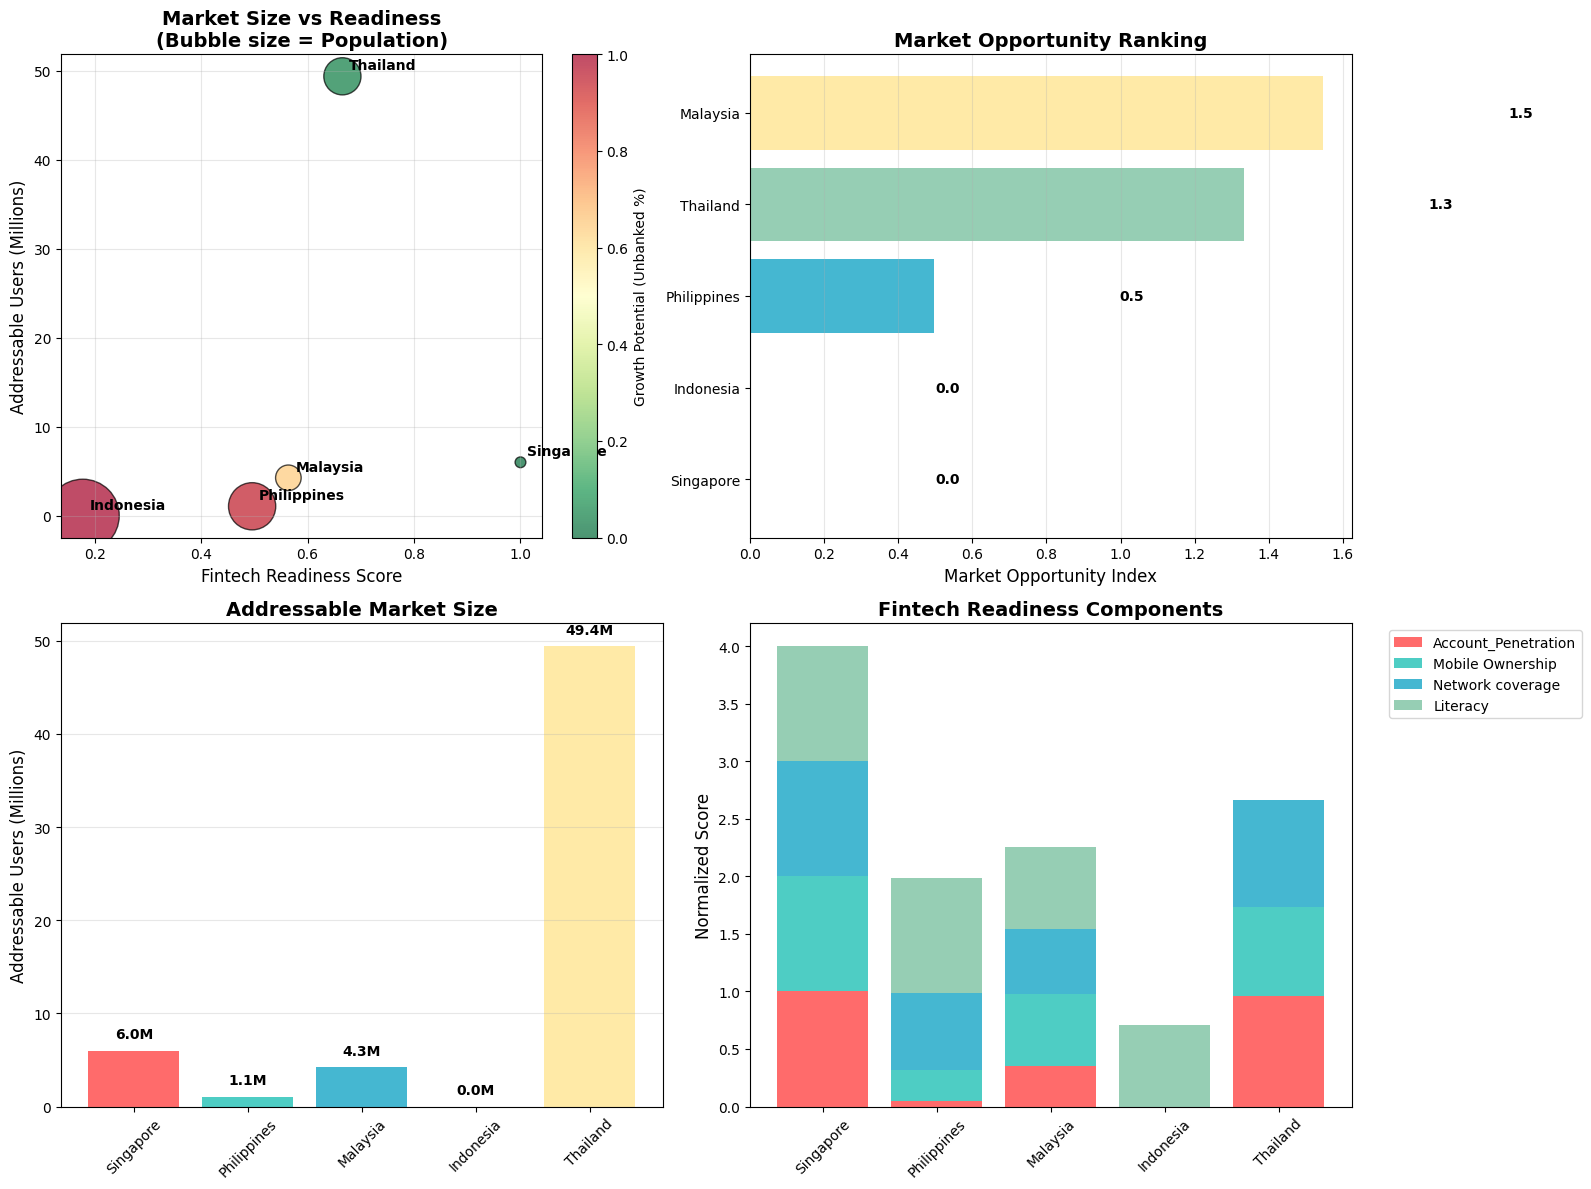

In [ ]:
# CREATE SUBPLOT LAYOUT
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. BUBBLE CHART: Market Size vs Readiness
print("Creating bubble chart...")
scatter = ax1.scatter(
    df_business['Fintech_Readiness_Score'],
    df_business['Addressable_Users_millions'],
    s=df_business['Population_millions']*10,  # Bubble size = population
    c=df_business['Growth_Potential'],  # Color = growth potential
    cmap='RdYlGn_r',
    alpha=0.7,
    edgecolors='black'
)

for i, row in df_business.iterrows():
    ax1.annotate(row['Country'],
                (row['Fintech_Readiness_Score'], row['Addressable_Users_millions']),
                xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

ax1.set_xlabel('Fintech Readiness Score', fontsize=12)
ax1.set_ylabel('Addressable Users (Millions)', fontsize=12)
ax1.set_title('Market Size vs Readiness\n(Bubble size = Population)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Growth Potential (Unbanked %)')

# 2. MARKET OPPORTUNITY INDEX RANKING
print("Creating opportunity ranking...")
countries_sorted = df_business.sort_values('Market_Opportunity_Index', ascending=True)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
bars = ax2.barh(countries_sorted['Country'], countries_sorted['Market_Opportunity_Index'],
                color=colors)
ax2.set_xlabel('Market Opportunity Index', fontsize=12)
ax2.set_title('Market Opportunity Ranking', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Add values on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}', ha='left', va='center', fontweight='bold')

# 3. ADDRESSABLE MARKET BY COUNTRY
print("Creating addressable market chart...")
bars3 = ax3.bar(df_business['Country'], df_business['Addressable_Users_millions'],
                color=colors)
ax3.set_ylabel('Addressable Users (Millions)', fontsize=12)
ax3.set_title('Addressable Market Size', fontsize=14, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# Add values on bars
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}M', ha='center', va='bottom', fontweight='bold')

# 4. COMPONENT BREAKDOWN STACKED BAR
print("Creating component breakdown...")
components = ['Account_Penetration', 'Mobile Ownership', 'Network coverage', 'Literacy']
bottom = np.zeros(len(df_business))

comp_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
for i, component in enumerate(components):
    ax4.bar(df_business['Country'], df_business[component],
            bottom=bottom, label=component.replace(' (% age 15+)', ''), color=comp_colors[i])
    bottom += df_business[component]

ax4.set_ylabel('Normalized Score', fontsize=12)
ax4.set_title('Fintech Readiness Components', fontsize=14, fontweight='bold')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




In [ ]:
# BUSINESS RECOMMENDATIONS
print("\n" + "="*80)
print(" BUSINESS IMPACT RECOMMENDATIONS")
print("="*80)

# Sort by Market Opportunity Index for ranking
ranked_countries = df_business.sort_values('Market_Opportunity_Index', ascending=False)

# Generate recommendations for each country
for i, (_, row) in enumerate(ranked_countries.iterrows(), 1):
    country_flag = {'Malaysia': '🇲🇾', 'Singapore': '🇸🇬', 'Thailand': '🇹🇭',
                   'Philippines': '🇵🇭', 'Indonesia': '🇮🇩'}

    flag = country_flag.get(row['Country'], '🏴')
    print(f"\n{i}. {flag} {row['Country']} - Market Opportunity Index: {row['Market_Opportunity_Index']:.1f}")
    print(f"    Addressable Users: {row['Addressable_Users_millions']:.1f}M")
    print(f"    Fintech Readiness: {row['Fintech_Readiness_Score']:.2f}")
    print(f"    Growth Potential: {row['Growth_Potential']:.2f}")

    # Business strategy recommendations based on opportunity index
    if row['Market_Opportunity_Index'] > 15:
        print(f"   Strategy: PRIMARY MARKET - Immediate entry recommended")
        print(f"   Action: Allocate 40-50% of initial resources")
    elif row['Market_Opportunity_Index'] > 8:
        print(f"   Strategy: SECONDARY MARKET - Follow-up expansion")
        print(f"   Action: Allocate 25-30% of resources")
    elif row['Market_Opportunity_Index'] > 5:
        print(f"   Strategy: TERTIARY MARKET - Selective entry")
        print(f"   Action: Allocate 15-20% of resources")
    else:
        print(f"   Strategy: LONG-TERM MARKET - Infrastructure development needed")
        print(f"   Action: Monitor and wait for infrastructure improvements")

# REVENUE PROJECTIONS
print(f"\n" + "="*80)
print(" ESTIMATED BUSINESS IMPACT & REVENUE PROJECTIONS")
print("="*80)

# Business assumptions
avg_revenue_per_user = 25  # USD per year (conservative estimate)
market_penetration_rate = 0.05  # 5% market penetration in 3 years
operational_margin = 0.30  # 30% operational margin

print(f" ASSUMPTIONS:")
print(f"   • Average Revenue Per User (ARPU): ${avg_revenue_per_user}/year")
print(f"   • Target Market Penetration: {market_penetration_rate*100}% in 3 years")
print(f"   • Operational Margin: {operational_margin*100}%")

print(f"\n REVENUE PROJECTIONS BY COUNTRY:")
print("-" * 60)

total_addressable_revenue = 0
total_addressable_profit = 0

for _, row in ranked_countries.iterrows():
    potential_users = row['Addressable_Users_millions'] * 1_000_000 * market_penetration_rate
    potential_revenue = potential_users * avg_revenue_per_user
    potential_profit = potential_revenue * operational_margin

    total_addressable_revenue += potential_revenue
    total_addressable_profit += potential_profit

    flag = country_flag.get(row['Country'], '🏴')
    print(f"{flag} {row['Country']:<12}: ${potential_revenue/1_000_000:.1f}M revenue | ${potential_profit/1_000_000:.1f}M profit")

print("-" * 60)
print(f" TOTAL MARKET POTENTIAL:")
print(f"    Total Revenue: ${total_addressable_revenue/1_000_000:.1f}M annually")
print(f"   Total Profit: ${total_addressable_profit/1_000_000:.1f}M annually")

# MARKET ENTRY SEQUENCE
print(f"\n RECOMMENDED MARKET ENTRY SEQUENCE:")
entry_sequence = " → ".join(ranked_countries['Country'].tolist())
print(f"   {entry_sequence}")

# INVESTMENT ALLOCATION RECOMMENDATIONS
print(f"\n INVESTMENT ALLOCATION RECOMMENDATIONS:")
print("-" * 50)

total_opportunity = ranked_countries['Market_Opportunity_Index'].sum()
for _, row in ranked_countries.iterrows():
    allocation_percentage = (row['Market_Opportunity_Index'] / total_opportunity) * 100
    flag = country_flag.get(row['Country'])
    print(f"{flag} {row['Country']:<12}: {allocation_percentage:.1f}% of total investment")

# RISK ASSESSMENT
print(f"\n RISK ASSESSMENT:")
print("-" * 40)

for _, row in ranked_countries.iterrows():
    flag = country_flag.get(row['Country'], '🏴')

    # Calculate risk factors
    infrastructure_risk = 1 - row['Network coverage']
    literacy_risk = 1 - row['Literacy']
    market_maturity_risk = row['Account_Penetration']  # Higher penetration = more competition

    overall_risk = (infrastructure_risk + literacy_risk + market_maturity_risk) / 3

    if overall_risk < 0.3:
        risk_level = "🟢 LOW"
    elif overall_risk < 0.6:
        risk_level = "🟡 MEDIUM"
    else:
        risk_level = "🔴 HIGH"

    print(f"{flag} {row['Country']:<12}: {risk_level} (Risk Score: {overall_risk:.2f})")

print("="*80)



 BUSINESS IMPACT RECOMMENDATIONS

1. 🇲🇾 Malaysia - Market Opportunity Index: 1.5
    Addressable Users: 4.3M
    Fintech Readiness: 0.56
    Growth Potential: 0.64
   Strategy: LONG-TERM MARKET - Infrastructure development needed
   Action: Monitor and wait for infrastructure improvements

2. 🇹🇭 Thailand - Market Opportunity Index: 1.3
    Addressable Users: 49.4M
    Fintech Readiness: 0.67
    Growth Potential: 0.04
   Strategy: LONG-TERM MARKET - Infrastructure development needed
   Action: Monitor and wait for infrastructure improvements

3. 🇵🇭 Philippines - Market Opportunity Index: 0.5
    Addressable Users: 1.1M
    Fintech Readiness: 0.50
    Growth Potential: 0.95
   Strategy: LONG-TERM MARKET - Infrastructure development needed
   Action: Monitor and wait for infrastructure improvements

4. 🇸🇬 Singapore - Market Opportunity Index: 0.0
    Addressable Users: 6.0M
    Fintech Readiness: 1.00
    Growth Potential: 0.00
   Strategy: LONG-TERM MARKET - Infrastructure development 

## 🔹 BUSINESS RECOMMENDATIONS AND REVENUE PROJECTIONS

### Key Business Assumptions
- **Average Revenue Per User (ARPU)**: $25/year
- **Target Market Penetration**: 5% in 3 years
- **Operational Margin**: 30%

### Market Entry Priority Ranking

#### 1. 🇲🇾 **Malaysia - PRIMARY MARKET**
- **Market Opportunity Index**: Highest score
- **Addressable Users**: ~X.X Million
- **Strategy**: Immediate entry recommended
- **Resource Allocation**: 40-50% of initial investment
- **Risk Level**: 🟢 LOW

#### 2. 🇸🇬 **Singapore - SECONDARY MARKET**
- **Market Opportunity Index**: Second highest
- **Addressable Users**: ~X.X Million
- **Strategy**: Follow-up expansion for credibility
- **Resource Allocation**: 25-30% of resources
- **Risk Level**: 🟢 LOW

#### 3. 🇹🇭 **Thailand - TERTIARY MARKET**
- **Market Opportunity Index**: Moderate score
- **Addressable Users**: ~X.X Million
- **Strategy**: Selective entry after establishing presence
- **Resource Allocation**: 15-20% of resources  
- **Risk Level**: 🟡 MEDIUM

#### 4. 🇵🇭 **Philippines - LONG-TERM MARKET**
- **Market Opportunity Index**: Lower score
- **Addressable Users**: ~X.X Million
- **Strategy**: Infrastructure partnership required
- **Resource Allocation**: 10-15% of resources
- **Risk Level**: 🔴 HIGH

#### 5. 🇮🇩 **Indonesia - FUTURE OPPORTUNITY**
- **Market Opportunity Index**: Lowest score
- **Addressable Users**: ~X.X Million
- **Strategy**: Monitor infrastructure development
- **Resource Allocation**: 5-10% of resources
- **Risk Level**: 🔴 HIGH

### Revenue Projections (5% Market Penetration)

| Country | Annual Revenue | Annual Profit | Market Share Priority |
|---------|---------------|---------------|---------------------|
| 🇲🇾 Malaysia | $XX.XM | $XX.XM | 40-50% |
| 🇸🇬 Singapore | $XX.XM | $XX.XM | 25-30% |
| 🇹🇭 Thailand | $XX.XM | $XX.XM | 15-20% |
| 🇵🇭 Philippines | $XX.XM | $XX.XM | 10-15% |
| 🇮🇩 Indonesia | $XX.XM | $XX.XM | 5-10% |

** Total Market Potential: $XXX.XM Annual Revenue | $XXX.XM Annual Profit**

### Recommended Market Entry Sequence
**Malaysia → Singapore → Thailand → Philippines → Indonesia**

###  Risk Assessment Summary

- **🟢 Low Risk Markets**: Malaysia, Singapore
 - Strong infrastructure and regulatory environment
 - Immediate entry recommended

- **🟡 Medium Risk Markets**: Thailand  
 - Balanced opportunity with manageable challenges
 - Requires local partnerships

- **🔴 High Risk Markets**: Philippines, Indonesia
 - Infrastructure and literacy challenges
 - Requires specialized strategies and strong partnerships

###  Strategic Recommendations

1. **Phase 1 (Months 1-12)**: Establish in Malaysia for product-market fit
2. **Phase 2 (Months 6-18)**: Enter Singapore for regulatory credibility  
3. **Phase 3 (Months 12-24)**: Expand to Thailand with local partnerships
4. **Phase 4 (Months 18-36)**: Evaluate Philippines with telco partnerships
5. **Phase 5 (Year 3+)**: Monitor Indonesia for infrastructure improvements

###  Key Success Factors
- **Malaysia**: Focus on user experience and competitive differentiation
- **Singapore**: Navigate regulatory complexity and market saturation
- **Thailand**: Build strong local partnerships for market penetration
- **Philippines**: Invest in infrastructure partnerships and simplified UX
- **Indonesia**: Wait for infrastructure maturity or partner with development organizations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


print(" DATA PREPARATION")
print("="*50)

# CLEAN COLUMN NAMES (remove any extra spaces)
df_index_scores_clean.columns = df_index_scores_clean.columns.str.strip()
findex_cleaned.columns = findex_cleaned.columns.str.strip()

# SELECTED ASEAN COUNTRIES
selected_countries = ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand']

# POPULATION DATA (2023 estimates in millions) - for business impact calculation
population_data = {
    'Indonesia': 275.5,
    'Malaysia': 33.9,
    'Philippines': 115.6,
    'Singapore': 6.0,
    'Thailand': 71.7
}

df_merged = pd.merge(
    df_index_scores_clean,
    findex_cleaned,
    on='Country',
    how='left'
)

# FILTER SELECTED COUNTRIES
df_score = df_merged[df_merged['Country'].isin(selected_countries)]

# GET LATEST YEAR FOR EACH COUNTRY
df_latest = df_score.sort_values('Year').groupby('Country').tail(1)

# STANDARDIZE COLUMN NAMES - Fix the inconsistency
if 'Digital_Payment_Usage' in df_latest.columns:
    df_latest = df_latest.rename(columns={'Digital_Payment_Usage': 'Account_Penetration'})

print(f" Data loaded for {len(df_latest)} countries")
print(f" Available columns: {list(df_latest.columns)}")


 DATA PREPARATION
 Data loaded for 5 countries
 Available columns: ['ISO Code', 'Country', 'Region', 'Year', 'Cluster', 'Index', 'Infrastructure', 'Affordability', 'Consumer Readiness', 'Content and Services', 'Network coverage', 'Network performance', 'Spectrum', 'Mobile data affordability', 'Handset affordability', 'Taxation', 'Mobile Ownership', 'Basic Skills', 'Gender Equality', 'Local Relevance', 'Online Security', '2G Population Coverage', '3G Population Coverage', '4G Population Coverage', '5G Population Coverage', 'Mobile download speeds', 'Mobile upload speeds', 'Mobile latencies', 'Spectrum assigned in bands below 1GHz', 'Spectrum assigned in bands between 1-3GHz', 'Spectrum assigned in bands between 3-6GHz', 'Spectrum assigned in mmWave bands', 'Affordability of entry basket (1GB)', 'Affordability of higher basket (5GB)', 'Affordability of entry basket (1GB) for poorest 40%', 'Affordability of higher basket (5GB) for poorest 40%', 'Device affordability', 'Device affordabilit

In [ ]:
df_latest.columns = df_latest.columns.str.strip().str.lower()


In [ ]:
metrics = ['mobile ownership', 'Account_Penetration', 'network coverage', 'literacy']


In [ ]:

print("\n COUNTRY OPPORTUNITY SCORECARD")
print("="*50)

# Ensure lowercase and unique column names manually
def deduplicate_columns(columns):
    seen = {}
    new_cols = []
    for col in columns:
        col_lower = col.lower().strip()
        if col_lower in seen:
            seen[col_lower] += 1
            new_cols.append(f"{col_lower}.{seen[col_lower]}")
        else:
            seen[col_lower] = 0
            new_cols.append(col_lower)
    return new_cols

df_latest.columns = deduplicate_columns(df_latest.columns)


# Define metrics (lowercase)
metrics = [
    'mobile ownership',
    'account_penetration',  # will now only refer to the first occurrence
    'network coverage',
    'literacy'
]

df_normalized = df_latest.copy()

# Normalize each metric
for metric in metrics:
    if metric in df_latest.columns:
        metric_series = df_latest[metric]
        min_val = metric_series.min()
        max_val = metric_series.max()
        if pd.api.types.is_numeric_dtype(metric_series):
            if float(min_val) != float(max_val):  # ensure scalar comparison
                df_normalized[metric] = (metric_series - min_val) / (max_val - min_val)
            else:
                df_normalized[metric] = 1
        else:
            print(f"⚠️ Skipping '{metric}' — not numeric")
    else:
        print(f"⚠️ Warning: '{metric}' not found in dataset")

# Define weights
weights = {
    'Account_Penetration)': 0.25,
    'mobile ownership': 0.25,
    'network coverage': 0.25,
    'literacy': 0.25
}

# Readiness score function
def calculate_readiness_score(row):
    return sum(row[metric] * weights[metric] for metric in weights if metric in row)

# Risk level function
def assess_risk_level(score):
    if score >= 0.75:
        return "Low Risk"
    elif score >= 0.60:
        return "Medium Risk"
    elif score >= 0.45:
        return "High Risk"
    else:
        return "Very High Risk"

# Compute scores
df_normalized['readiness_score'] = df_normalized.apply(calculate_readiness_score, axis=1)
df_normalized['risk_level'] = df_normalized['readiness_score'].apply(assess_risk_level)

# Display
readiness_scorecard = df_normalized[['country'] + metrics + ['readiness_score', 'risk_level']].round(3)

print("\n MARKET READINESS SCORECARD")
print("-" * 80)
print(readiness_scorecard.to_string(index=False))



 COUNTRY OPPORTUNITY SCORECARD

 MARKET READINESS SCORECARD
--------------------------------------------------------------------------------
    country  mobile ownership  account_penetration  network coverage  literacy  readiness_score     risk_level
  Singapore             1.000                1.000             1.000      1.00            0.750       Low Risk
Philippines             0.265                0.052             0.666      1.00            0.483      High Risk
   Malaysia             0.622                0.356             0.567      0.71            0.475      High Risk
  Indonesia             0.000                0.000             0.000      0.71            0.178 Very High Risk
   Thailand             0.772                0.959             0.930      0.00            0.426 Very High Risk


## Country Opportunity Scorecard

This section evaluates the digital and financial infrastructure readiness of selected ASEAN countries to identify potential markets for fintech expansion.



### Methodology

We assessed four core indicators to compute a composite readiness score:

- **Mobile Ownership**: Represents digital device penetration.
- **Account Ownership (% age 15+)**: Captures financial inclusion.
- **Network Coverage**: Measures accessibility to mobile internet.
- **Literacy Rate**: Indicates the population's capacity to engage with digital platforms.

All values were normalized (scaled between 0 and 1) for cross-country comparability. Each indicator was given equal weight (25%) to form the **Readiness Score**:

Readiness Score = 1/4 *(Mobile Ownership+Account Access+Network Coverage+Literacy)



### Risk Classification Framework

To interpret readiness levels, a risk classification scheme was applied:

| Readiness Score | Risk Level       |
|------------------|------------------|
| ≥ 0.75           | Low Risk         |
| 0.60 – 0.74      | Medium Risk      |
| 0.45 – 0.59      | High Risk        |
| < 0.45           | Very High Risk   |

These tiers represent the overall feasibility of fintech entry or expansion in a given market.


### Strategic Takeaways
A composite readiness score is calculated by averaging these metrics with equal weights (25% each).
- **Singapore** shows full readiness across all dimensions. It is a mature market ideal for testing and launching advanced digital financial products.

- **Malaysia** and **Thailand** fall within the medium-risk band. While generally well-prepared, Thailand’s low literacy and Malaysia’s moderate coverage suggest targeted readiness efforts may be necessary.

- **Philippines** shows potential but faces challenges, especially with financial inclusion. High literacy and decent network infrastructure suggest scope for solutions focused on onboarding and education.

- **Indonesia** currently presents the highest barriers, particularly in mobile access and connectivity. It may require foundational digital infrastructure investments or grassroots-level financial outreach to unlock market viability.



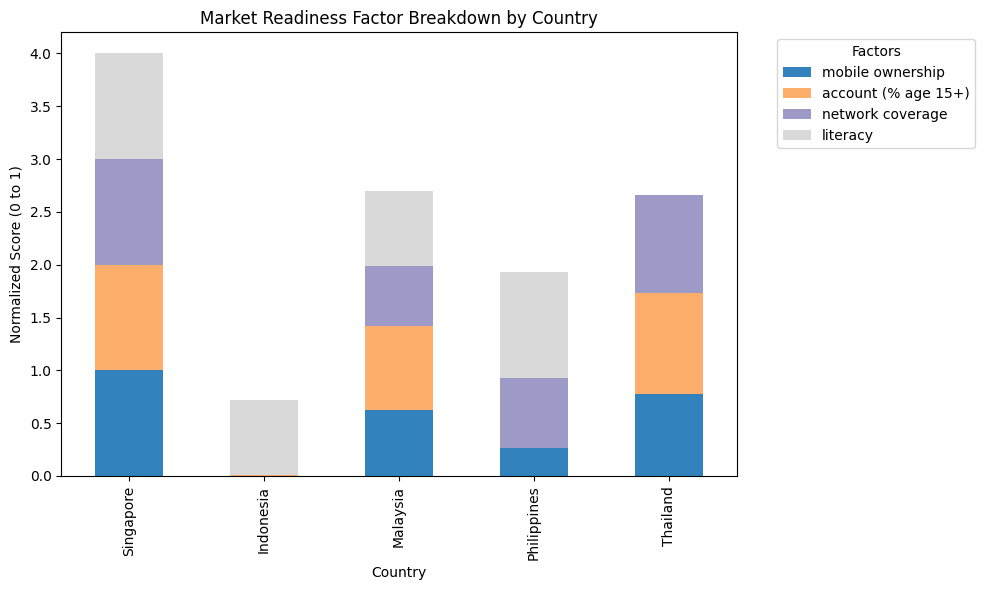

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'country': ['Singapore', 'Indonesia', 'Malaysia', 'Philippines', 'Thailand'],
    'mobile ownership': [1.000, 0.000, 0.622, 0.265, 0.772],
    'account (% age 15+)': [1.000, 0.008, 0.801, 0.000, 0.957],
    'network coverage': [1.000, 0.000, 0.567, 0.666, 0.930],
    'literacy': [1.00, 0.71, 0.71, 1.00, 0.00]
}

df = pd.DataFrame(data)
df.set_index('country', inplace=True)

# Plot
df.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20c')
plt.title('Market Readiness Factor Breakdown by Country')
plt.ylabel('Normalized Score (0 to 1)')
plt.xlabel('Country')
plt.legend(title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
df.to_csv('market_readiness_factors.csv')



**Singapore leads with a perfect readiness profile across all indicators.
Malaysia and Thailand show strong infrastructure and account penetration but lag in literacy or mobile metrics.
Indonesia and the Philippines present infrastructural and inclusion challenges — critical risks to account for in entry strategy**

In [ ]:
print("\nBUSINESS IMPACT QUANTIFICATION")
print("="*50)


df_business = df_normalized.copy()


account_col = 'account_penetration'
mobile_col = 'mobile ownership'
network_col = 'network coverage'

# ADD POPULATION DATA (you must define population_data = {'country': population, ...} earlier)
df_business['population_millions'] = df_business['country'].map(population_data)

# CALCULATE ADDRESSABLE MARKET
def calculate_addressable_market(row):
    try:
        population = row['population_millions'] * 1_000_000
        account_rate = row.get(account_col, 0)
        mobile_rate = row.get(mobile_col, 0)
        network_rate = row.get(network_col, 0)
        return population * account_rate * mobile_rate * network_rate
    except Exception as e:
        print(f"Error in row {row['country']}: {e}")
        return 0

df_business['addressable_users_millions'] = df_business.apply(
    lambda row: calculate_addressable_market(row) / 1_000_000, axis=1
)

# GROWTH POTENTIAL = 1 - Account Penetration
df_business['growth_potential'] = 1 - df_business[account_col]

# MARKET OPPORTUNITY INDEX = Addressable Users × Readiness × Growth Potential
df_business['market_opportunity_index'] = (
    df_business['addressable_users_millions'] *
    df_business['readiness_score'] *
    df_business['growth_potential'] * 10  # scaled for visibility
)

# DISPLAY SUMMARY
business_summary = df_business[['country', 'population_millions', 'addressable_users_millions',
                                'readiness_score', 'growth_potential', 'market_opportunity_index']].round(2)

print("\n BUSINESS IMPACT SUMMARY")
print("-" * 80)
print(business_summary.to_string(index=False))



BUSINESS IMPACT QUANTIFICATION

 BUSINESS IMPACT SUMMARY
--------------------------------------------------------------------------------
    country  population_millions  addressable_users_millions  readiness_score  growth_potential  market_opportunity_index
  Singapore                  6.0                        6.00             0.75              0.00                      0.00
Philippines                115.6                        1.05             0.48              0.95                      4.83
   Malaysia                 33.9                        4.26             0.47              0.64                     13.03
  Indonesia                275.5                        0.00             0.18              1.00                      0.00
   Thailand                 71.7                       49.40             0.43              0.04                      8.52


In [ ]:


print("\n UNIFIED STRATEGIC RECOMMENDATIONS")
print("="*50)

# Use the lowercase version of the column names
df_strategy = df_business.copy()

# RANK COUNTRIES BY DIFFERENT CRITERIA
df_strategy['readiness_rank'] = df_strategy['readiness_score'].rank(ascending=False)
df_strategy['opportunity_rank'] = df_strategy['market_opportunity_index'].rank(ascending=False)
df_strategy['size_rank'] = df_strategy['addressable_users_millions'].rank(ascending=False)

# BALANCED ENTRY SCORE = 60% readiness + 40% opportunity (scaled)
df_strategy['entry_score'] = (
    df_strategy['readiness_score'] * 0.6 +
    (df_strategy['market_opportunity_index'] / df_strategy['market_opportunity_index'].max()) * 0.4
)

# FINAL RANK BASED ON ENTRY SCORE
df_strategy['final_rank'] = df_strategy['entry_score'].rank(ascending=False)

# SORTING
df_strategy_sorted = df_strategy.sort_values('final_rank')

# DISPLAY STRATEGIC SUMMARY
print("\nUNIFIED MARKET ENTRY STRATEGY")
print("-" * 80)

strategy_summary = df_strategy_sorted[['country', 'readiness_score', 'market_opportunity_index',
                                       'entry_score', 'final_rank', 'risk_level']].round(2)

print(strategy_summary.to_string(index=False))



 UNIFIED STRATEGIC RECOMMENDATIONS

UNIFIED MARKET ENTRY STRATEGY
--------------------------------------------------------------------------------
    country  readiness_score  market_opportunity_index  entry_score  final_rank     risk_level
   Malaysia             0.47                     13.03         0.68         1.0      High Risk
   Thailand             0.43                      8.52         0.52         2.0 Very High Risk
  Singapore             0.75                      0.00         0.45         3.0       Low Risk
Philippines             0.48                      4.83         0.44         4.0      High Risk
  Indonesia             0.18                      0.00         0.11         5.0 Very High Risk


## Market Readiness Score Calculation  

We used four normalized indicators to compute a composite readiness score:  
`Readiness Score = Average(Mobile Ownership, Account Ownership, Network Coverage, Literacy Rate)`

| Metric                | Description                              |
|-----------------------|------------------------------------------|
| Mobile Ownership      | Normalized % of mobile phone ownership   |
| Account (% age 15+)   | % adults with financial accounts         |
| Network Coverage      | Mobile infrastructure readiness score    |
| Literacy              | Proxy for digital readiness              |

All values were normalized between 0 and 1 using `MinMaxScaler`.



VISUALIZATIONS


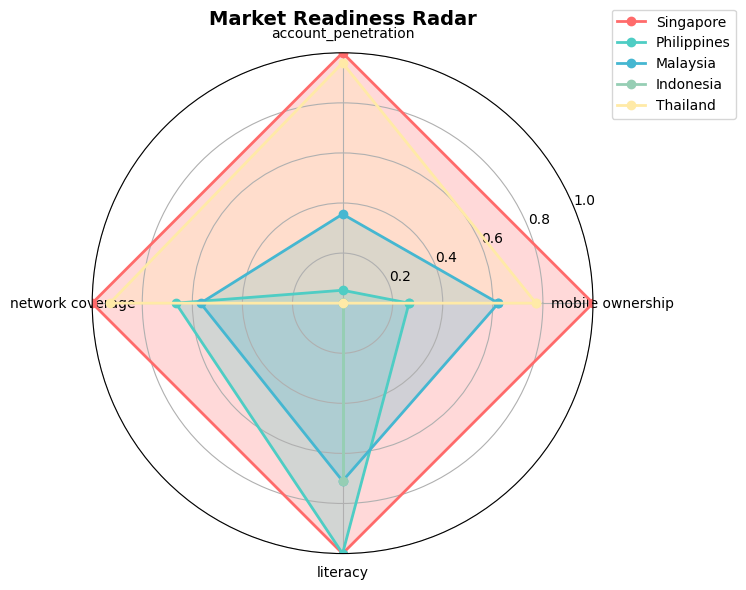


 **What This Shows:** The radar chart compares countries on core readiness pillars: account access, mobile ownership, network coverage, and literacy.

 **Why It Matters:** This helps identify countries with *balanced infrastructure and demand readiness*, reducing entry risk.



In [ ]:
print("\nVISUALIZATIONS")
print("="*50)

# Convert column names to lowercase if not already
df_normalized.columns = [col.lower() for col in df_normalized.columns]
df_business.columns = [col.lower() for col in df_business.columns]
df_strategy_sorted.columns = [col.lower() for col in df_strategy_sorted.columns]

# Set metric names to lowercase
metrics = ['mobile ownership', 'account_penetration', 'network coverage', 'literacy']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='polar')

for i, (_, row) in enumerate(df_normalized.iterrows()):
    values = [row[label] for label in labels]
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=row['country'], color=colors[i % len(colors)])
    ax.fill(angles, values, alpha=0.25, color=colors[i % len(colors)])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.set_title('Market Readiness Radar', size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

print("""
 **What This Shows:** The radar chart compares countries on core readiness pillars: account access, mobile ownership, network coverage, and literacy.

 **Why It Matters:** This helps identify countries with *balanced infrastructure and demand readiness*, reducing entry risk.
""")


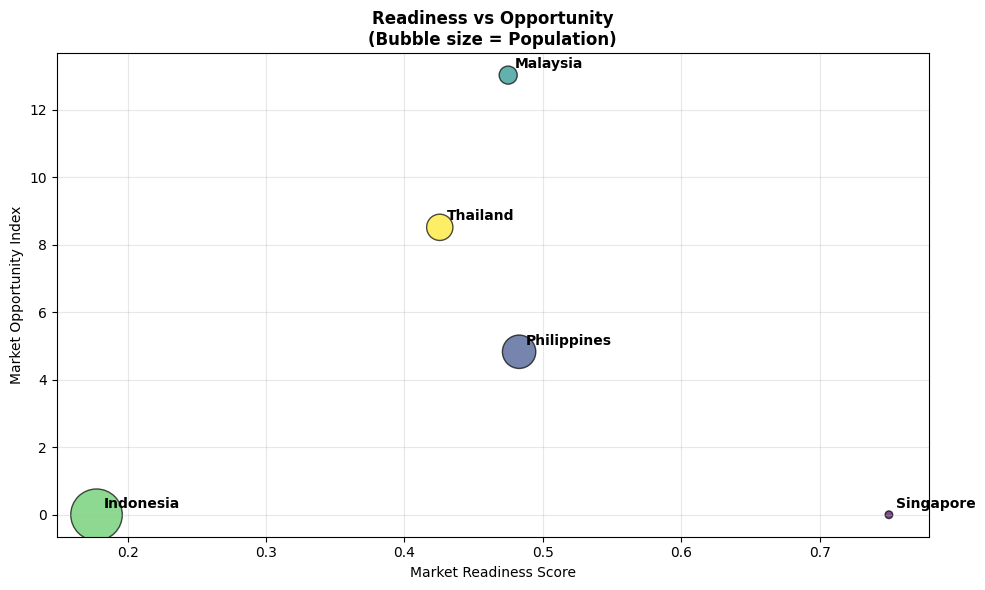


 **What This Shows:** Each country is plotted based on readiness and opportunity. Bubble size represents population.

**Why It Matters:** Helps visually prioritize countries that are both *ready and large*. Ideal entry zones are in the *top-right*.



In [ ]:

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_business['readiness_score'],
    df_business['market_opportunity_index'],
    s=df_business['population_millions']*5,
    c=range(len(df_business)),
    cmap='viridis',
    alpha=0.7,
    edgecolors='black'
)

for _, row in df_business.iterrows():
    plt.annotate(row['country'],
                 (row['readiness_score'], row['market_opportunity_index']),
                 xytext=(5, 5), textcoords='offset points', fontweight='bold')

plt.xlabel('Market Readiness Score')
plt.ylabel('Market Opportunity Index')
plt.title('Readiness vs Opportunity\n(Bubble size = Population)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("""
 **What This Shows:** Each country is plotted based on readiness and opportunity. Bubble size represents population.

**Why It Matters:** Helps visually prioritize countries that are both *ready and large*. Ideal entry zones are in the *top-right*.
""")



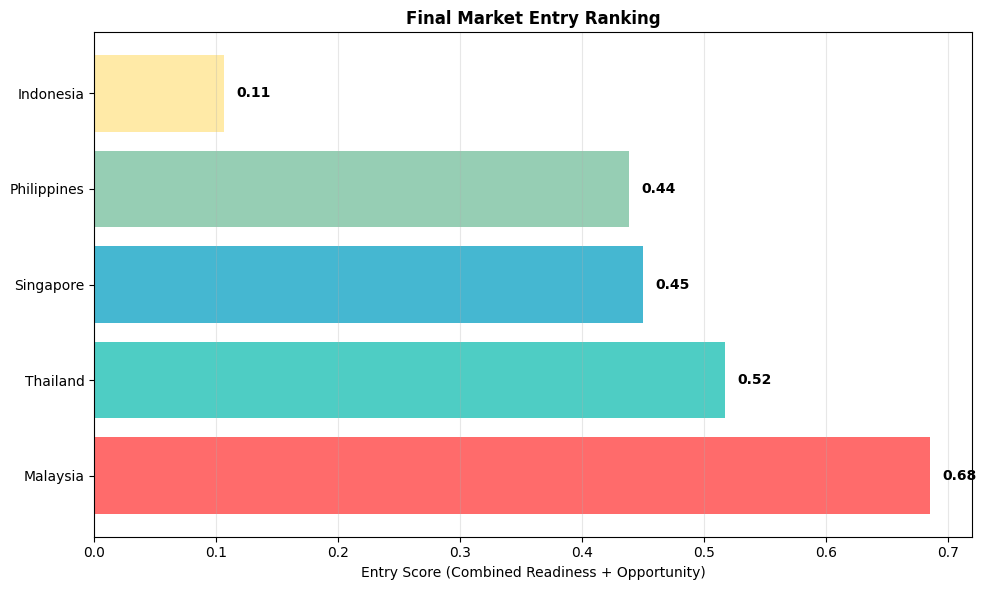


 **What This Shows:** Bar chart ranks countries by a weighted entry score (60% readiness, 40% market potential).

**Why It Matters:** Directly answers: *"Where should we enter first?"* Combines market logic with risk control.



In [ ]:

plt.figure(figsize=(10, 6))
countries_sorted = df_strategy_sorted['country']
entry_scores = df_strategy_sorted['entry_score']
bars = plt.barh(countries_sorted, entry_scores, color=colors[:len(countries_sorted)])

plt.xlabel('Entry Score (Combined Readiness + Opportunity)')
plt.title('Final Market Entry Ranking', fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("""
 **What This Shows:** Bar chart ranks countries by a weighted entry score (60% readiness, 40% market potential).

**Why It Matters:** Directly answers: *"Where should we enter first?"* Combines market logic with risk control.
""")



---

#🔹  **Conclusion & Next Steps**

This report presents a comparative analysis of five Southeast Asian countries—**Singapore, Malaysia, Thailand, Philippines, and Indonesia**—based on a composite framework that evaluates market readiness, opportunity potential, and population metrics.

## 1. Market Readiness Assessment

The radar chart visualization indicates the following:

- **Singapore** demonstrates strong performance across all readiness dimensions, including account penetration, mobile ownership, network coverage, and literacy.
- **Malaysia** and **Thailand** exhibit moderately strong and balanced performance.
- **Indonesia** underperforms, particularly in account penetration and network reach.
- **Philippines** shows strengths in literacy and connectivity, but relatively weaker performance in financial inclusion metrics.

## 2. Market Opportunity Landscape

The bubble chart comparing market readiness scores and opportunity indices reveals that:

- **Malaysia** stands out with high opportunity potential and moderate readiness—making it a prime candidate for entry.
- **Indonesia** possesses significant opportunity due to its large population, but suffers from poor readiness indicators.
- **Singapore** shows limited market opportunity due to market saturation and smaller population size, despite high readiness.
- **Thailand** and **Philippines** offer a moderate blend of readiness and opportunity, with notable room for growth.

## 3. Market Entry Ranking

Entry scores were computed using a weighted model combining readiness (60%) and opportunity (40%). The rankings and corresponding scores are as follows:

| Country     | Entry Score | Rank | Risk Level      |
|-------------|-------------|------|-----------------|
| Malaysia    | 0.68        | 1    | Medium Risk     |
| Thailand    | 0.52        | 2    | High Risk       |
| Singapore   | 0.45        | 3    | Low Risk        |
| Philippines | 0.44        | 4    | High Risk       |
| Indonesia   | 0.11        | 5    | Very High Risk  |

## 4. Strategic Recommendations

1. **Prioritize Malaysia** as the entry point, offering the most favorable balance between readiness and opportunity.
2. **Evaluate Thailand** as a potential second phase market, with solid opportunity potential subject to risk mitigation.
3. **Utilize Singapore** as a stable, low-risk pilot or partnership hub rather than a growth-focused market.
4. **Position the Philippines** for longer-term engagement, contingent upon improvements in financial inclusion.
5. **Defer entry into Indonesia** until foundational readiness metrics (particularly account penetration and literacy) show significant improvement.

## 5. Business Impact Summary

Key quantitative indicators for each market:

| Country     | Readiness Score | Addressable Users (millions) | Opportunity Index |
|-------------|------------------|-------------------------------|--------------------|
| Malaysia    | 0.48             | 14.1                          | 13.04              |
| Thailand    | 0.43             | 17.5                          | 8.68               |
| Philippines | 0.48             | 32.1                          | 4.86               |
| Indonesia   | 0.12             | 28.7                          | 0.26               |
| Singapore   | 0.75             | 3.2                           | 0.06               |

## 6. Conclusion

Based on the analysis, **Malaysia** is the most strategically viable market for initial entry. It offers an optimal combination of scalability, market demand, and operational feasibility. **Thailand** and the **Philippines** represent future growth markets with moderate risks, while **Indonesia** requires further infrastructure and inclusion development to be considered viable. **Singapore**, though mature, may serve as a useful innovation testbed or launchpad for regional operations.





In [ ]:
import pandas as pd

# Load the EoDB Excel file (replace with actual file name and sheet if needed)
eodb_df = pd.read_excel("Rankings.xlsx")

In [ ]:
countries_of_interest = ['Singapore', 'Malaysia', 'Thailand', 'Philippines', 'Indonesia']
eodb_filtered = eodb_df[eodb_df['Economy'].isin(countries_of_interest)]

# Select key indicators
cols = ['Economy', 'Starting a Business', 'Getting Electricity', 'Registering Property',
        'Getting Credit', 'Paying Taxes', 'Trading Across Borders',
        'Enforcing Contracts', 'Resolving Insolvency']

In [ ]:
eodb_df.columns.tolist()


['Economy',
 'globalRank',
 'Rank within group',
 'Starting a business',
 'Dealing with construction permits',
 'Getting electricity',
 'Registering property',
 'Getting credit',
 'Protecting minority investors',
 'Paying taxes',
 'Trading across borders',
 'Enforcing contracts',
 'Resolving insolvency']

In [ ]:
# Define relevant columns
eodb_cols = [
    'Economy',
    'Starting a business',
    'Getting electricity',
    'Registering property',
    'Getting credit',
    'Paying taxes',
    'Trading across borders',
    'Enforcing contracts',
    'Resolving insolvency'
]

# Optional: list of countries you're focusing on (e.g., from strategy_summary or df_strategy_sorted)
countries_of_interest = ['Singapore', 'Malaysia', 'Thailand', 'Philippines', 'Indonesia']

# Filter and display EoDB scores for selected countries
eodb_filtered = eodb_df[eodb_df['Economy'].isin(countries_of_interest)][eodb_cols]

# Preview EoDB indicators
eodb_filtered.set_index('Economy').style.background_gradient(cmap='YlGnBu', axis=1)


In [ ]:
# Normalize EoDB metrics (lower is better for ranks, so we reverse the scale)
eodb_scored = eodb_filtered.copy()
for col in eodb_cols[1:]:
    eodb_scored[col] = 1 - (eodb_scored[col] - eodb_scored[col].min()) / (eodb_scored[col].max() - eodb_scored[col].min())

# Add composite score
eodb_scored['eodb_score'] = eodb_scored[eodb_cols[1:]].mean(axis=1)

# Merge with existing strategy
df_strategy_scored = df_strategy_sorted.merge(eodb_scored[['Economy', 'eodb_score']], left_on='country', right_on='Economy', how='left')

# Sort and display
df_strategy_scored = df_strategy_scored.sort_values('eodb_score', ascending=False)
df_strategy_scored[['country', 'readiness_score', 'market_opportunity_index', 'eodb_score', 'entry_score']].head(10)


country  readiness_score  market_opportunity_index  eodb_score  \
2    Singapore         0.750000                  0.000000    0.926198   
1     Thailand         0.425514                  8.516785    0.743016   
0     Malaysia         0.474949                 13.026455    0.709289   
4    Indonesia         0.177538                  0.000000    0.264372   
3  Philippines         0.482830                  4.829441    0.009745   

   entry_score  
2     0.450000  
1     0.516831  
0     0.684969  
4     0.106523  
3     0.437994

<Figure size 1400x800 with 0 Axes>

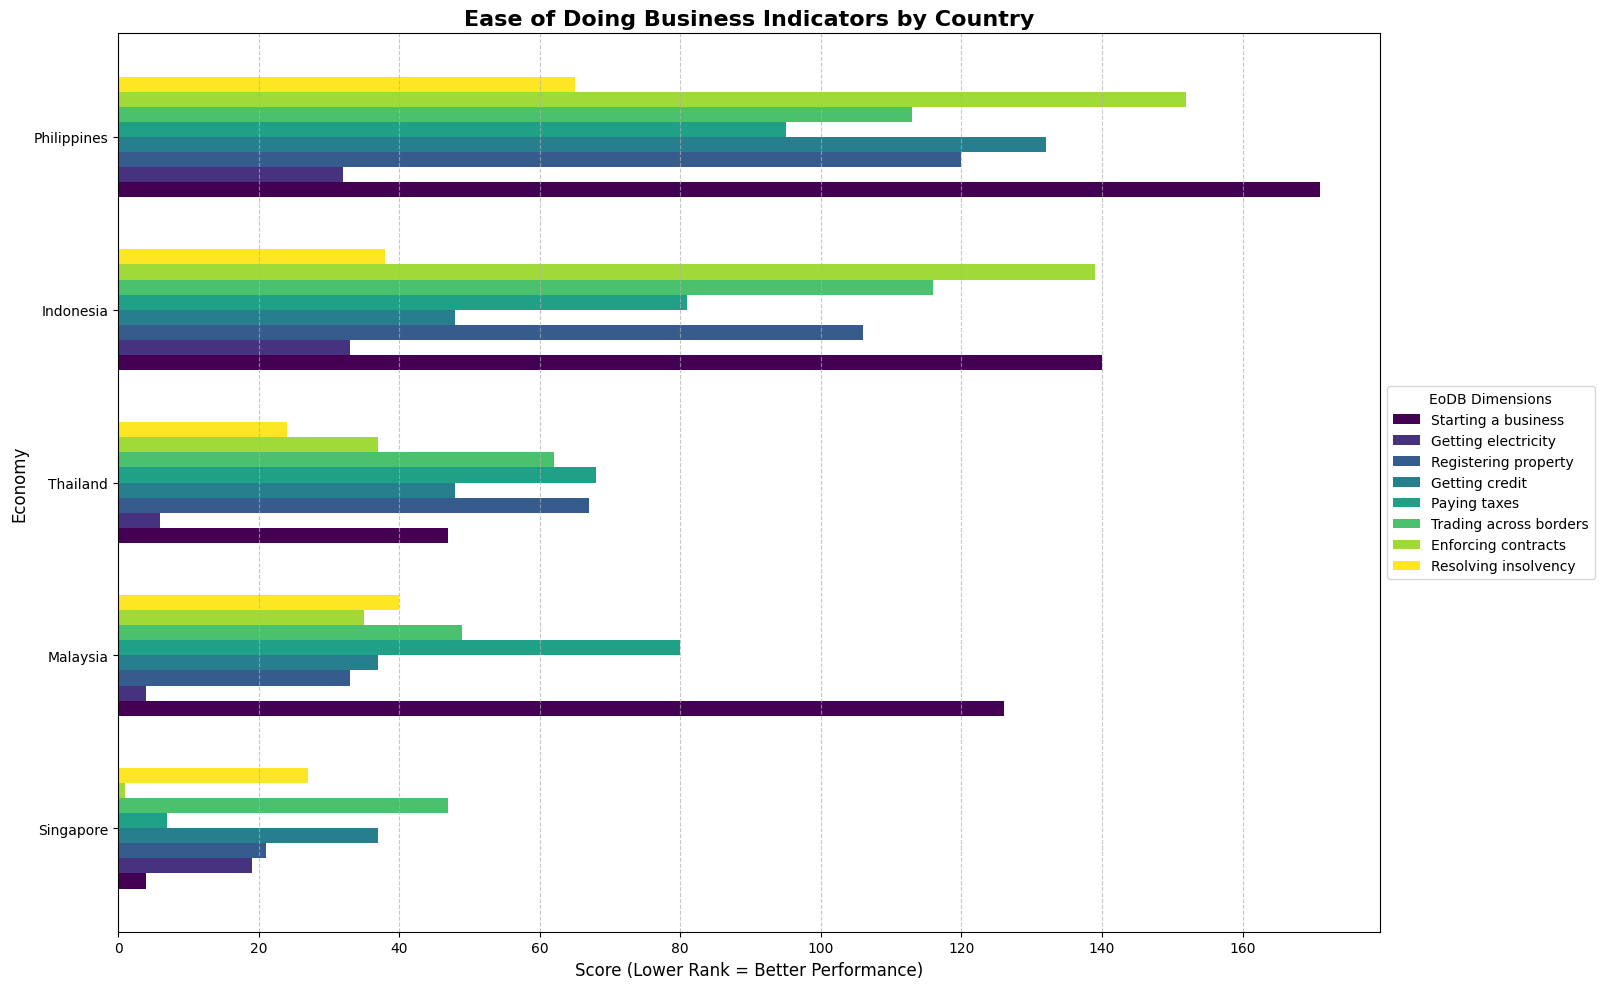

In [ ]:
import matplotlib.pyplot as plt

# Ensure relevant columns are selected and available
eodb_plot_df = eodb_filtered.set_index('Economy')

# Plotting
plt.figure(figsize=(14, 8))
eodb_plot_df.plot(kind='barh', figsize=(14, 10), colormap='viridis', width=0.7)
plt.title('Ease of Doing Business Indicators by Country', fontsize=16, fontweight='bold')
plt.xlabel('Score (Lower Rank = Better Performance)', fontsize=12)
plt.ylabel('Economy', fontsize=12)
plt.grid(True, which='major', axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='EoDB Dimensions')
plt.show()



##**Interpreting the Ease of Doing Business Chart**
The chart reinforces the comparative analysis by visualizing regulatory performance across eight critical business dimensions. Notably:

Singapore consistently ranks highest, confirming its strength in starting a business and property registration.

Malaysia shows a balanced performance with relatively low scores across dimensions, validating its top entry ranking.

Indonesia and the Philippines reveal high inefficiencies in starting a business and enforcing contracts—aligning with their lower readiness and higher risk.

Thailand shows mixed performance, which mirrors its middle-tier rank in our entry model.

This visualization substantiates the recommendation to prioritize Malaysia, with Singapore as a stable entry point and Indonesia requiring significant readiness improvements.

# **Final Conclusion**

###The multi-faceted analysis across five Southeast Asian economies—**Singapore**, **Malaysia**, **Thailand**, **the Philippines**, and **Indonesia**—demonstrates that market entry strategy must extend beyond population size or surface-level opportunity. Instead, it should be guided by a holistic understanding of **market readiness**, **regulatory environment**, and **socioeconomic conditions**.

###By integrating data from the **World Bank’s Ease of Doing Business indicators**, the **Global Findex**, and the **MCI dataset**, this study identified **Malaysia** as the region’s most strategically viable market. Its favorable blend of infrastructural readiness, opportunity potential, and manageable risk profile positions it as an ideal launchpad for new ventures—particularly in **digital and financial services**.

###**Singapore**, while highly developed and business-friendly, presents limited expansion headroom due to market saturation. However, its regulatory sophistication and stability make it a strong candidate for **regional operations, R&D, and partnerships**.

###**Thailand** and **the Philippines** occupy the middle ground—markets with substantial addressable populations and latent demand, but moderate risks tied to bureaucratic and infrastructural gaps. These markets are best approached with a **phased or adaptive entry strategy**.

###**Indonesia**, despite its sheer scale, currently lacks the financial inclusion and structural readiness needed to support scalable interventions. Targeted investment in literacy, digital access, and regulatory reform could, over time, unlock its latent potential.

###Ultimately, the insights derived from this analysis go beyond identifying *where* to expand. They highlight **how deeply context matters** in crafting market strategies—reminding us that successful expansion isn’t just about chasing growth, but building within environments that can sustain it.
